In [34]:
# For nicer printing
options(digits=2);

In [35]:
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);

data <- survey[,-c(1:7)];
data <- data[ ,-which(names(data) %in% c("HomeWYN","HomeSYN","AwayWNY","AwaySNY","City","Utility",
           "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","SqftCate"))];

In [36]:
#now explore variables
summary(data);

     HomeW        HomeS         AwayW         AwayS        IncHomeS 
 Min.   :50   Min.   :40    Min.   :45    Min.   :40    Min.   : 1  
 1st Qu.:68   1st Qu.:68    1st Qu.:62    1st Qu.:70    1st Qu.: 3  
 Median :70   Median :72    Median :67    Median :75    Median : 4  
 Mean   :70   Mean   :71    Mean   :66    Mean   :74    Mean   :11  
 3rd Qu.:72   3rd Qu.:75    3rd Qu.:70    3rd Qu.:78    3rd Qu.: 6  
 Max.   :95   Max.   :85    Max.   :95    Max.   :95    Max.   :99  
 NA's   :80   NA's   :164   NA's   :151   NA's   :264               
    IncHomeW    RewardForm      IncAwayS     IncAwayW      IncWD   
 Min.   : 1   Min.   : 1.0   Min.   : 1   Min.   : 1   Min.   :1   
 1st Qu.: 3   1st Qu.: 4.0   1st Qu.: 3   1st Qu.: 3   1st Qu.:3   
 Median : 4   Median : 5.0   Median : 5   Median : 5   Median :5   
 Mean   : 7   Mean   : 4.5   Mean   :12   Mean   : 7   Mean   :5   
 3rd Qu.: 6   3rd Qu.: 5.0   3rd Qu.: 7   3rd Qu.: 7   3rd Qu.:6   
 Max.   :99   Max.   :12.0   Max.   :99 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 659 rows containing non-finite values (stat_bin)."

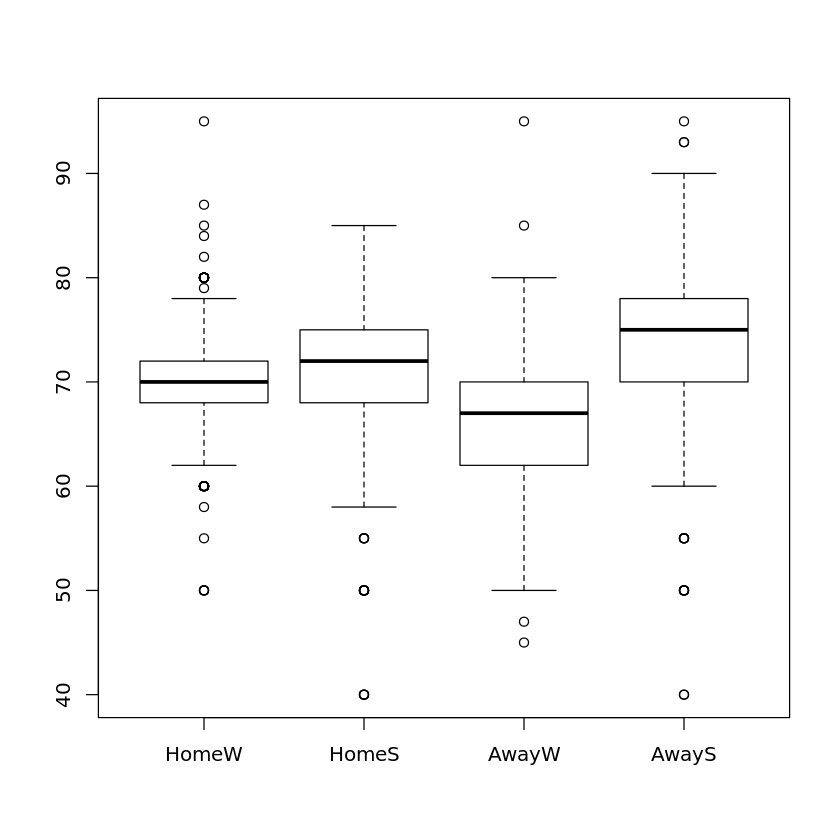

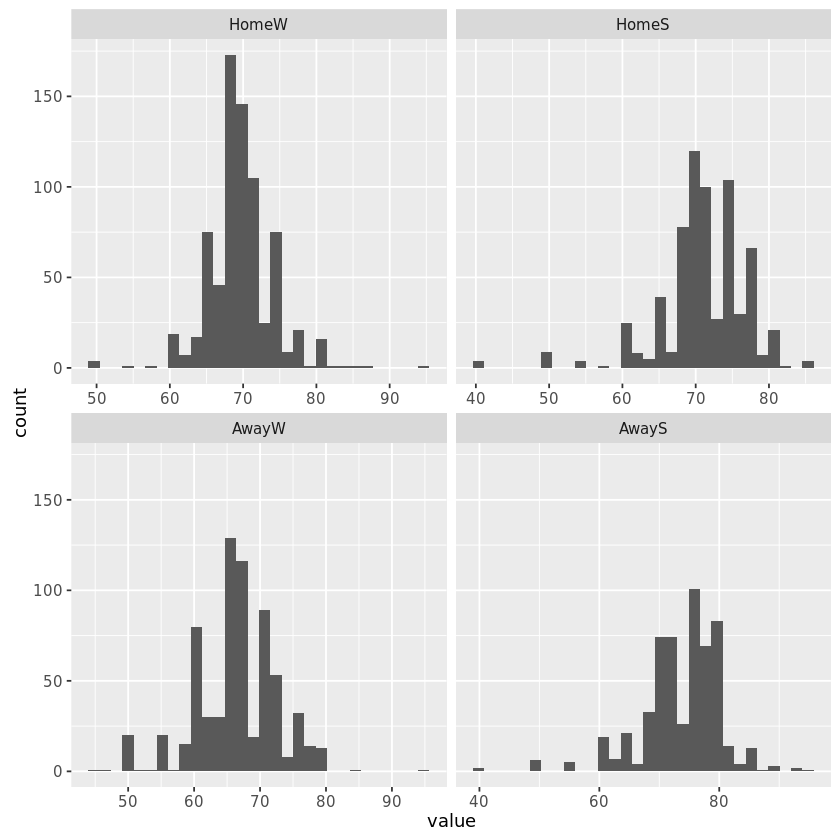

In [37]:
library(reshape2)
library(ggplot2)
d <- melt(data,-c(1:4))
boxplot(data[,c(1:4)])
ggplot(d,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


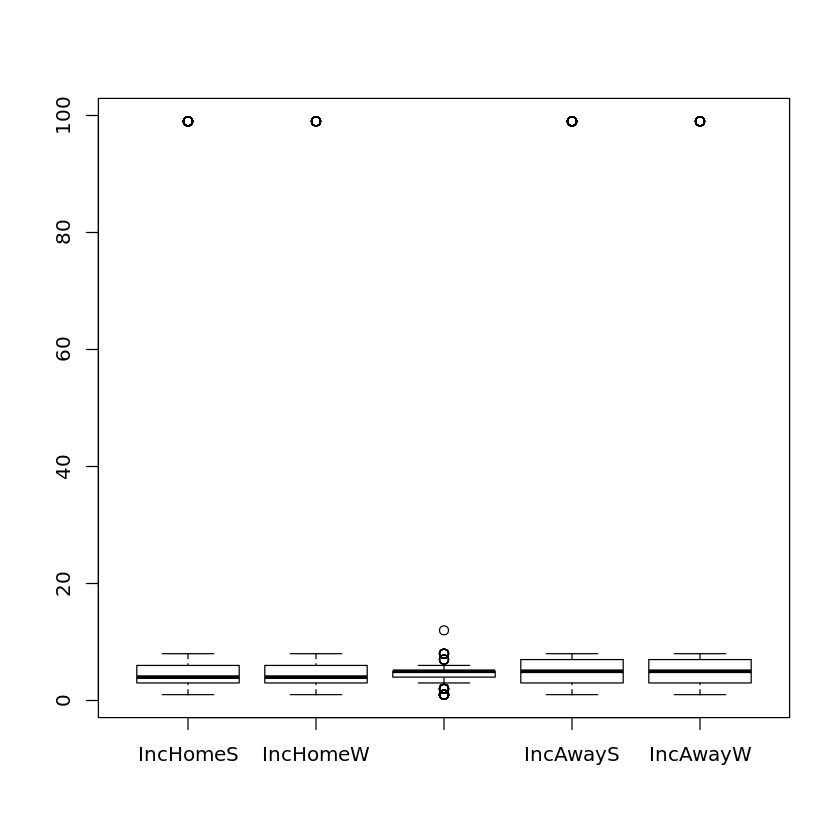

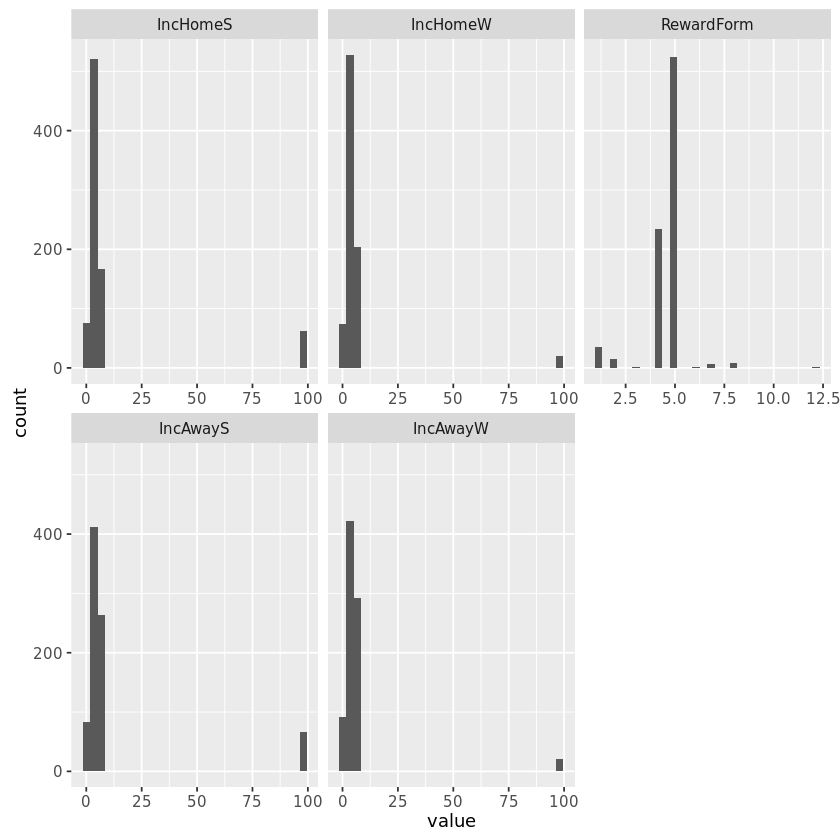

In [38]:
d <- melt(data,-c(5:9))
boxplot(data[,c(5:9)])
ggplot(d,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 369 rows containing non-finite values (stat_bin)."

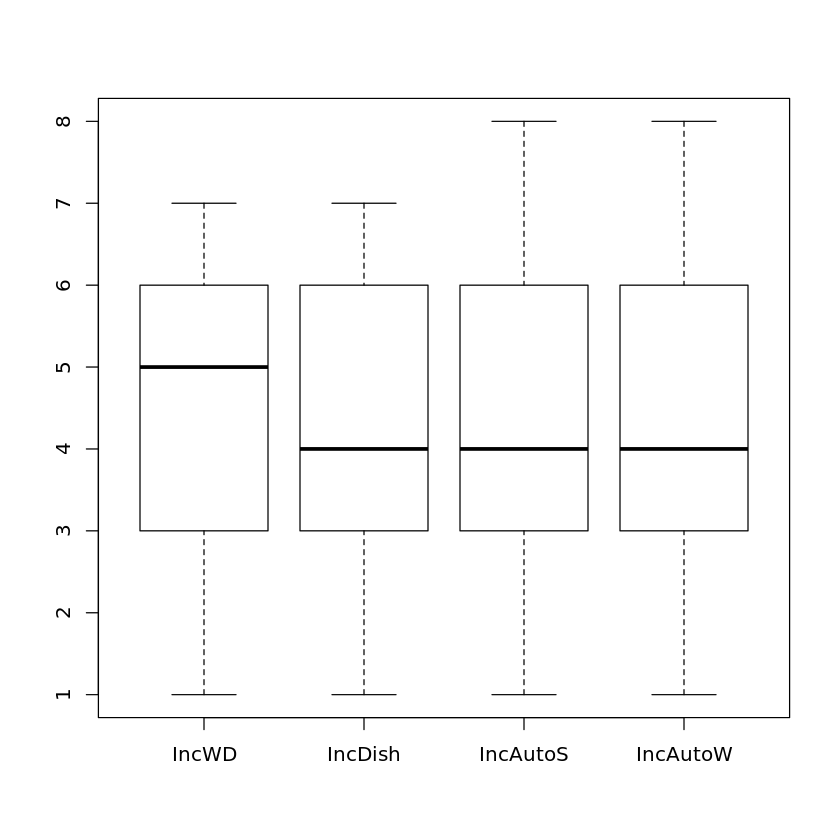

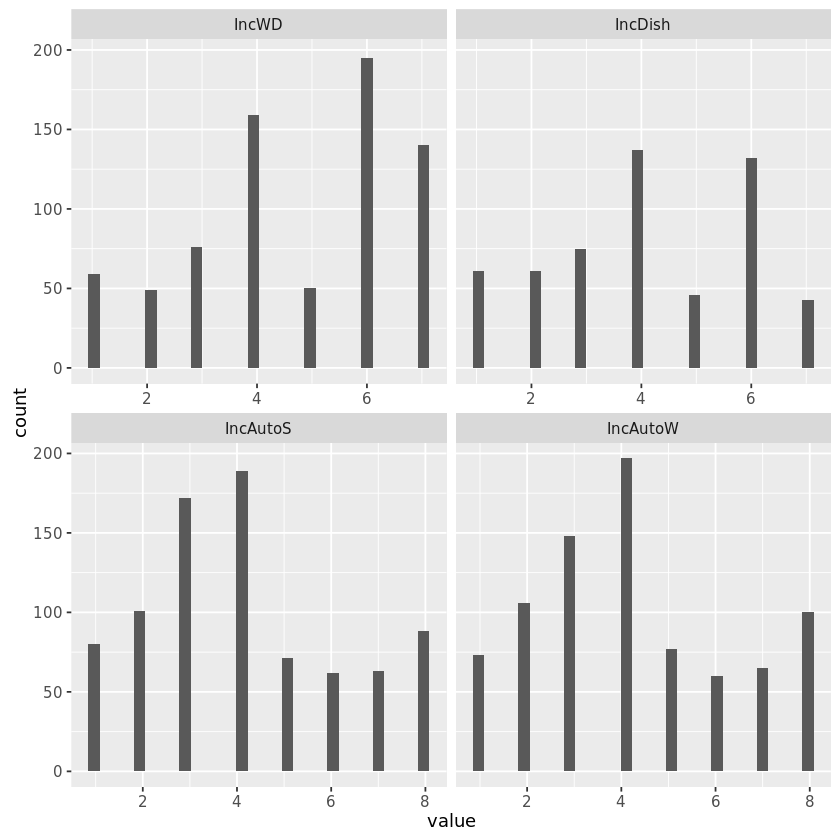

In [39]:
d <- melt(data,-c(10:13))
boxplot(data[,c(10:13)])
ggplot(d,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


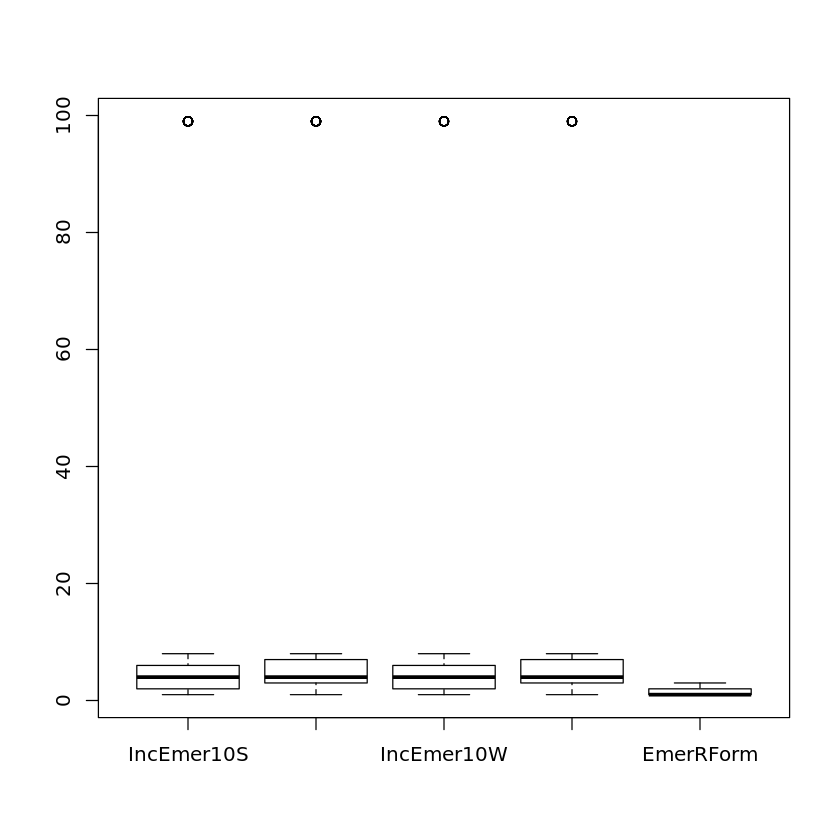

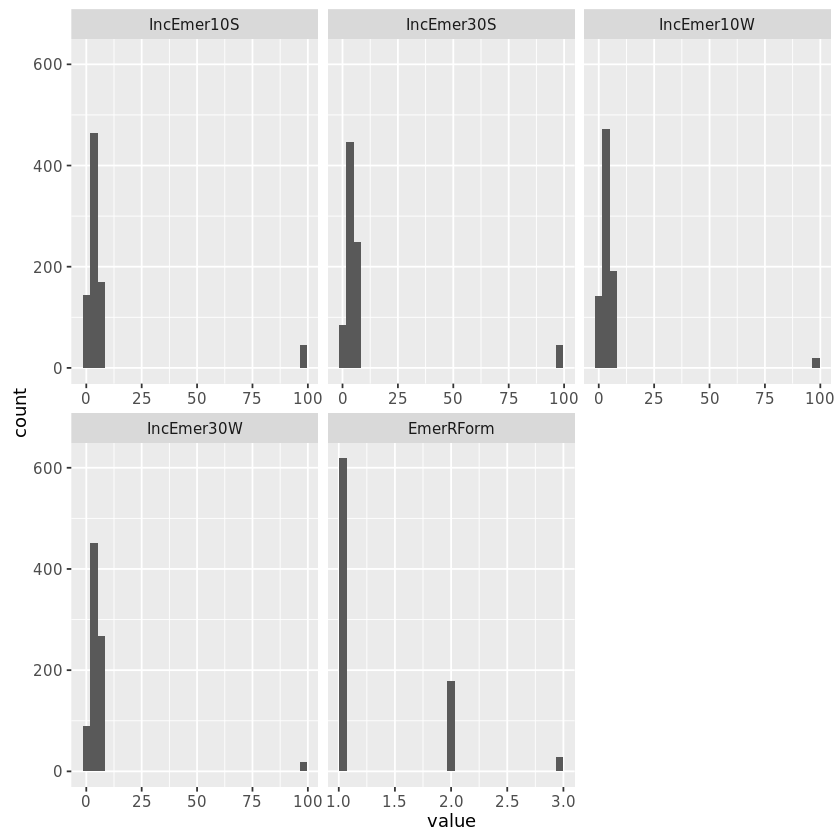

In [40]:
d <- melt(data,-c(14:18))
boxplot(data[,c(14:18)])
ggplot(d,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


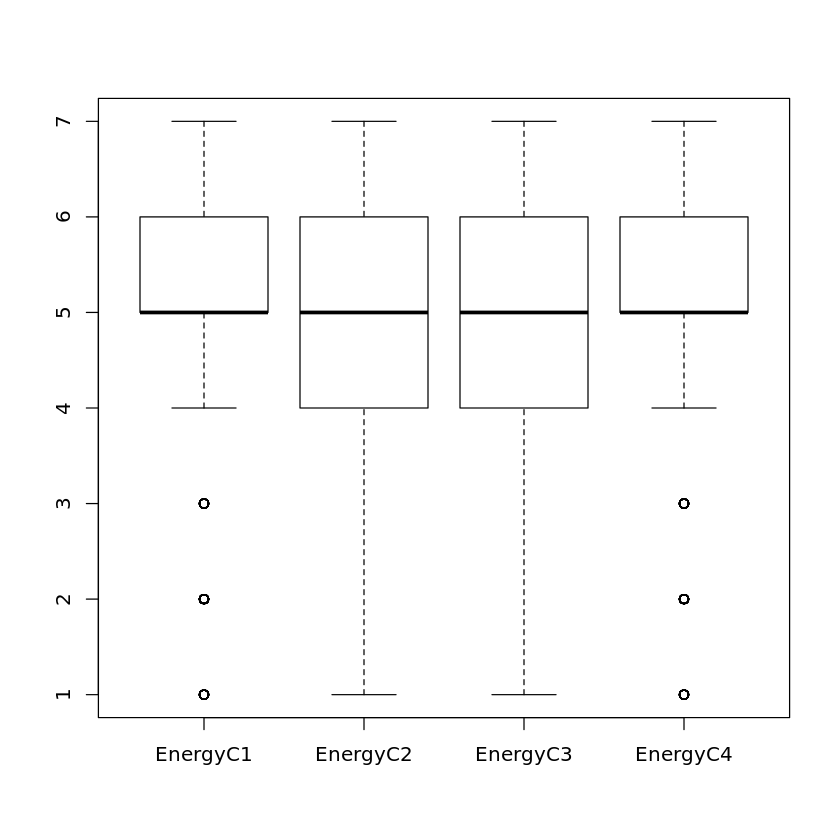

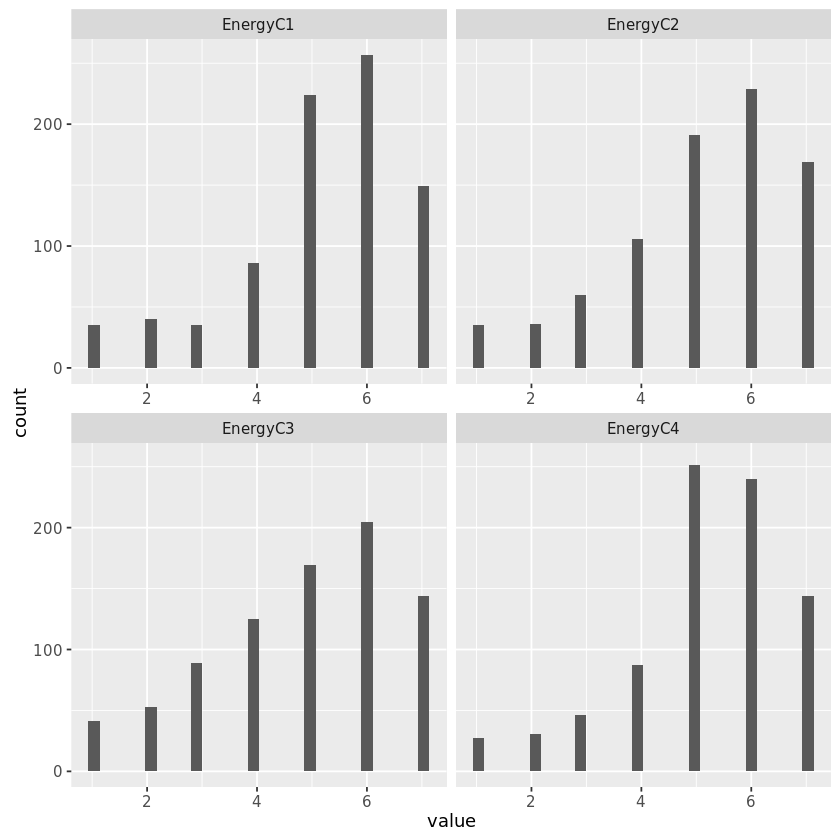

In [41]:
da <- melt(data,-c(19:22))
boxplot(data[,c(19:22)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


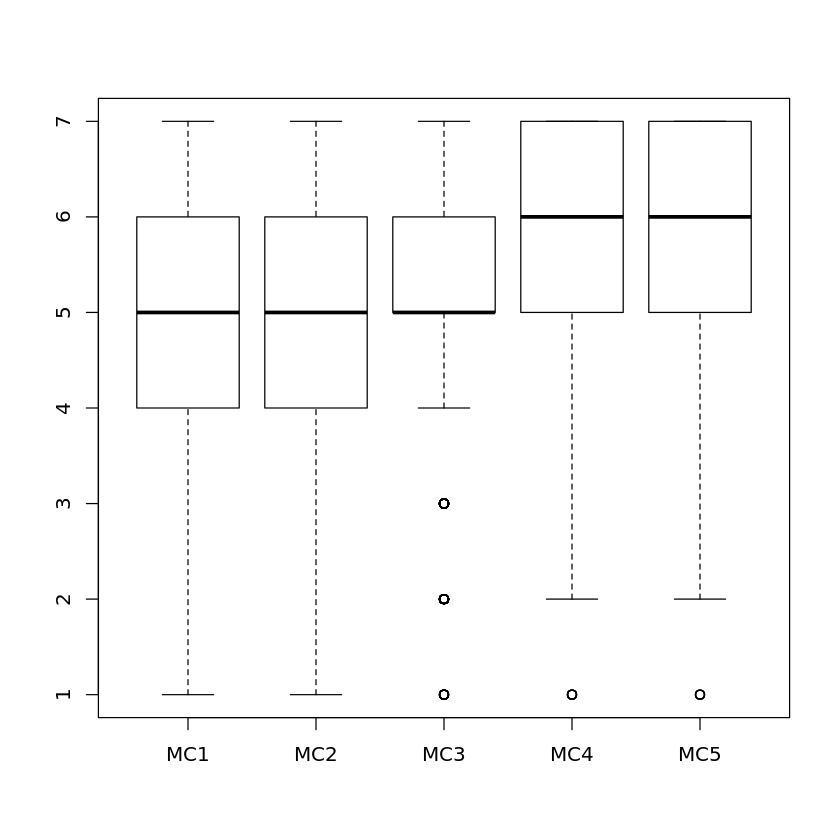

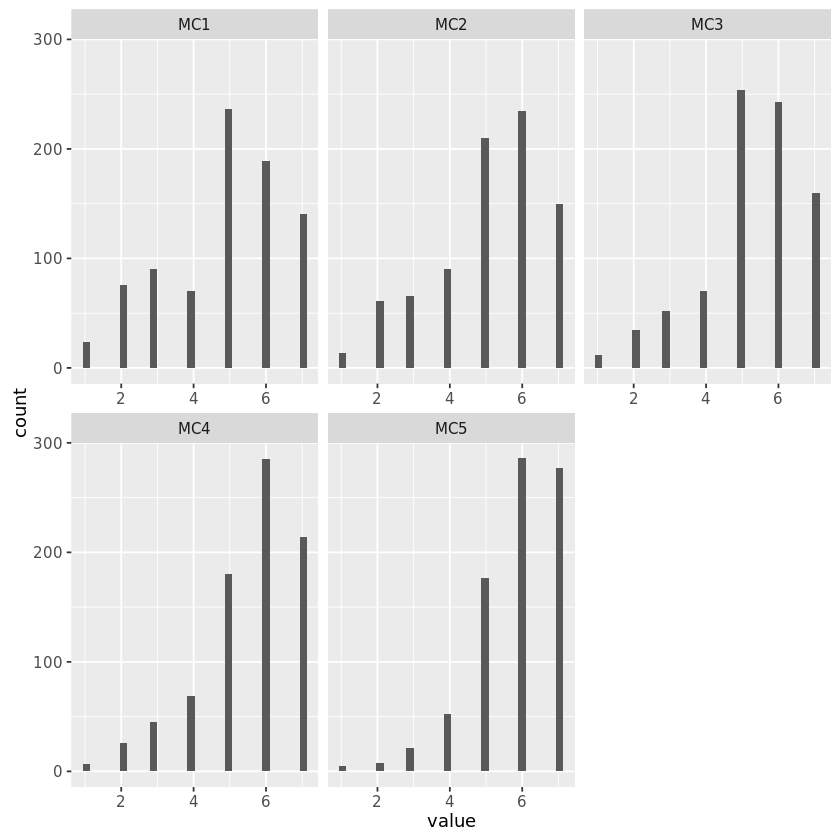

In [42]:
da <- melt(data,-c(23:27))
boxplot(data[,c(23:27)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


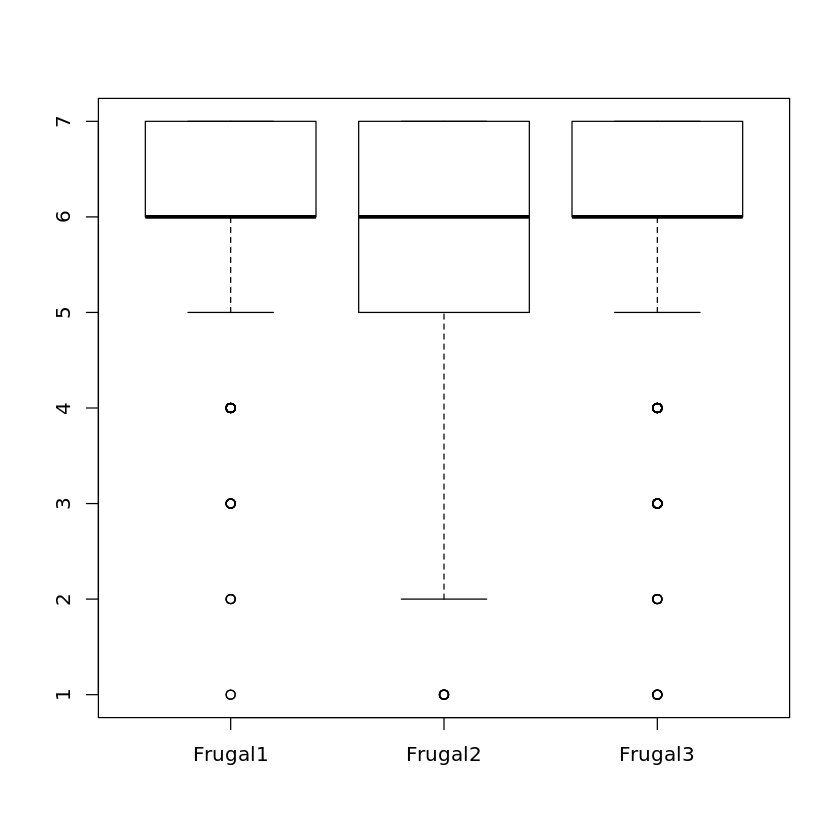

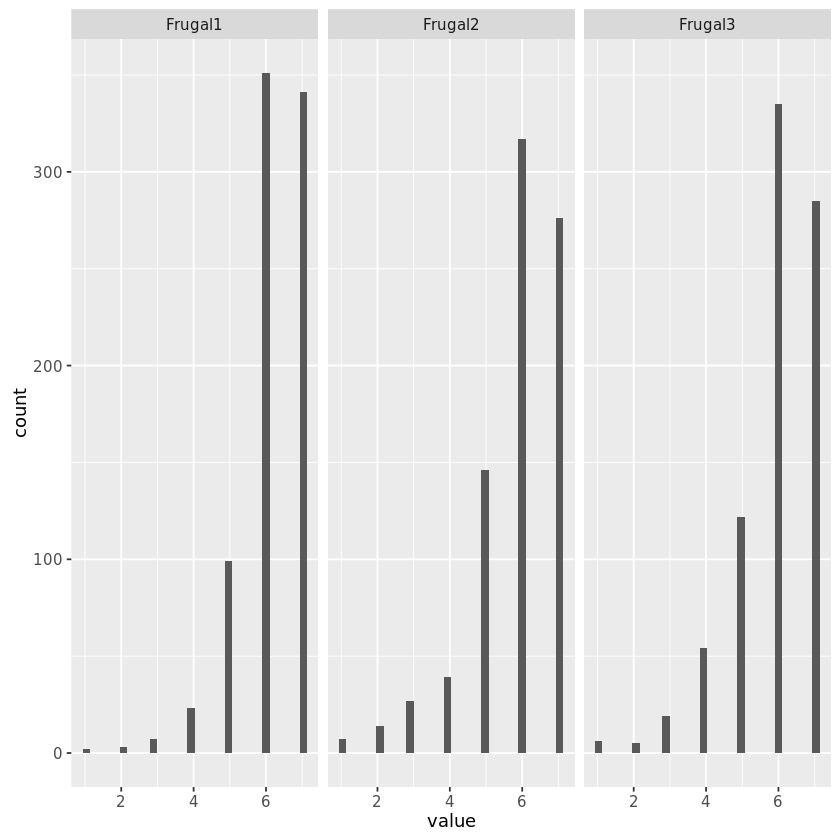

In [43]:
da <- melt(data,-c(28:30))
boxplot(data[,c(28:30)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


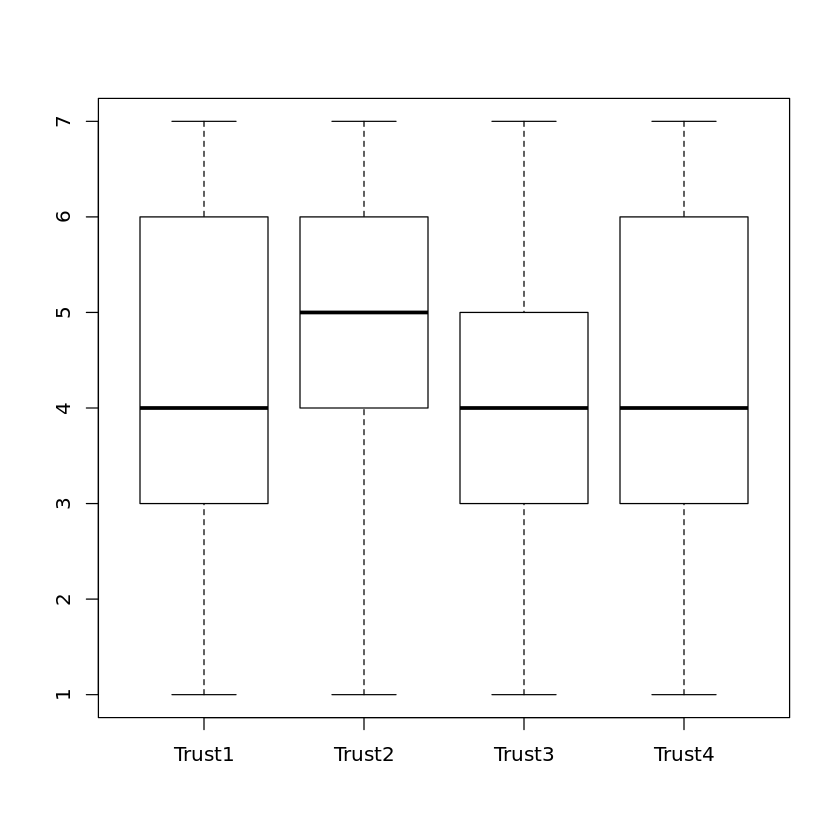

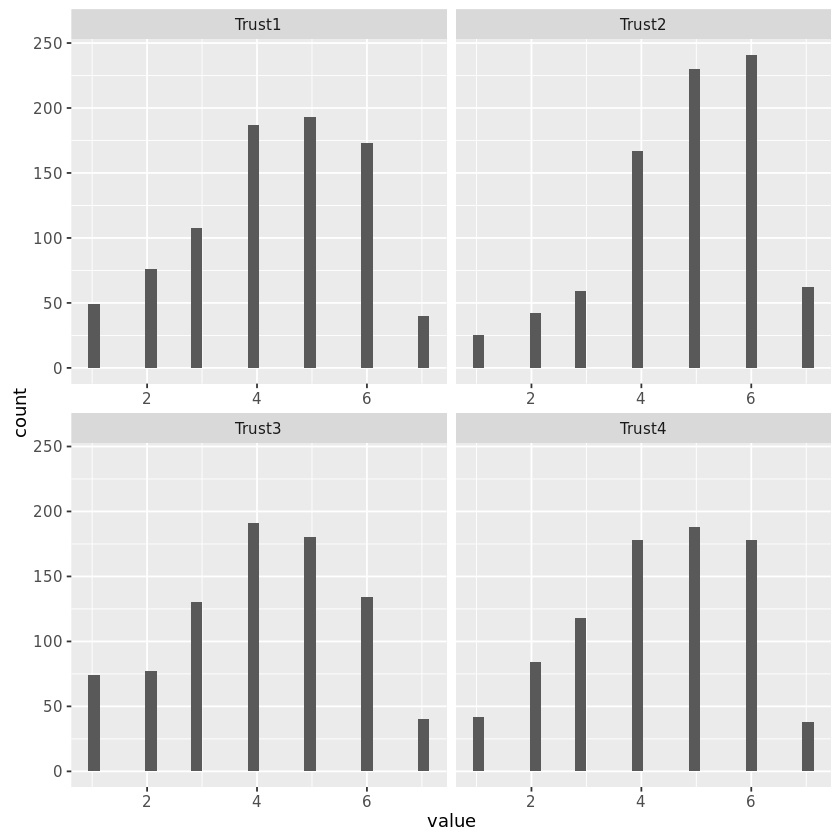

In [44]:
da <- melt(data,-c(31:34))
boxplot(data[,c(31:34)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


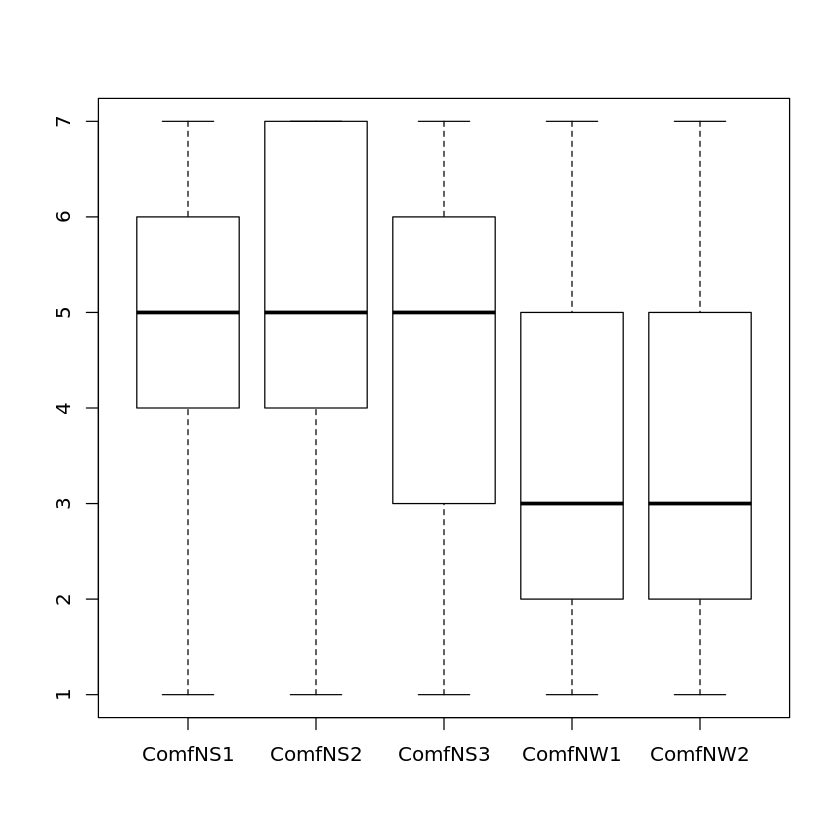

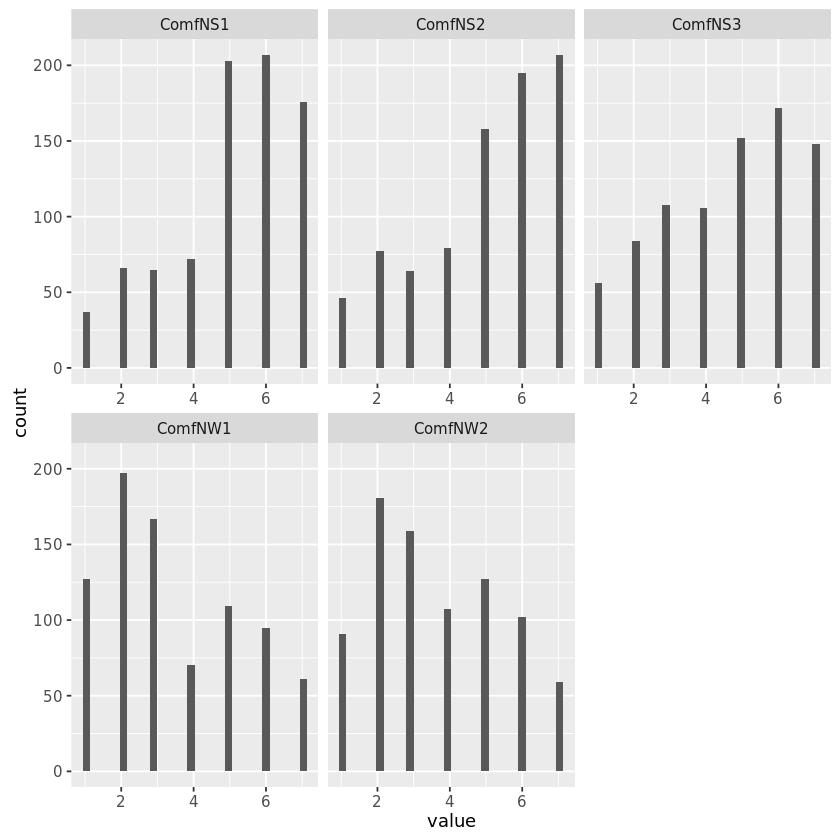

In [45]:
da <- melt(data,-c(35:39))
boxplot(data[,c(35:39)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


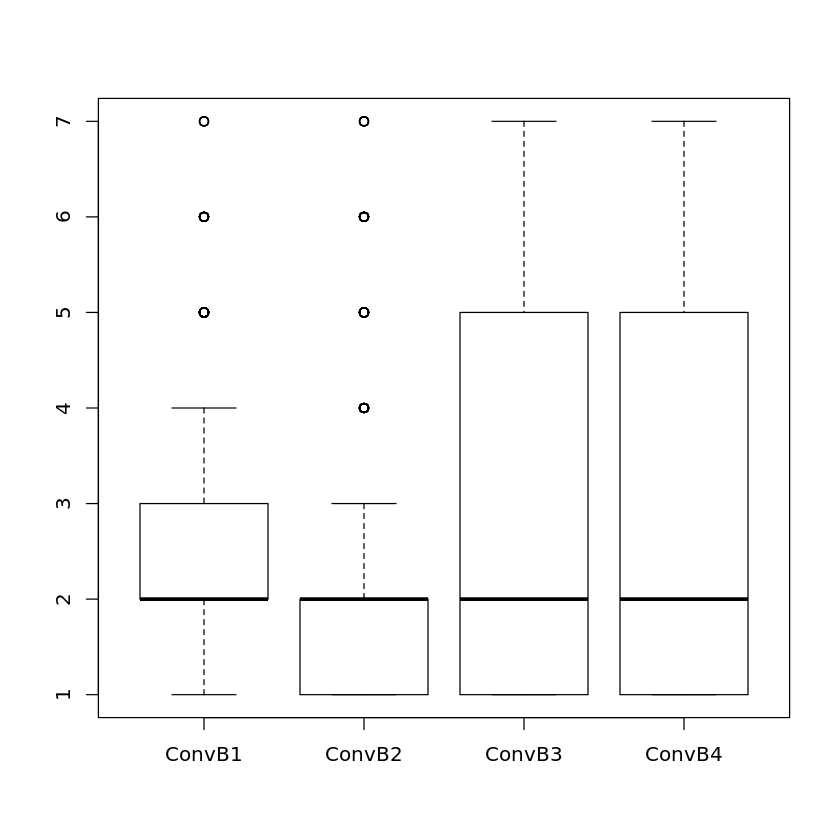

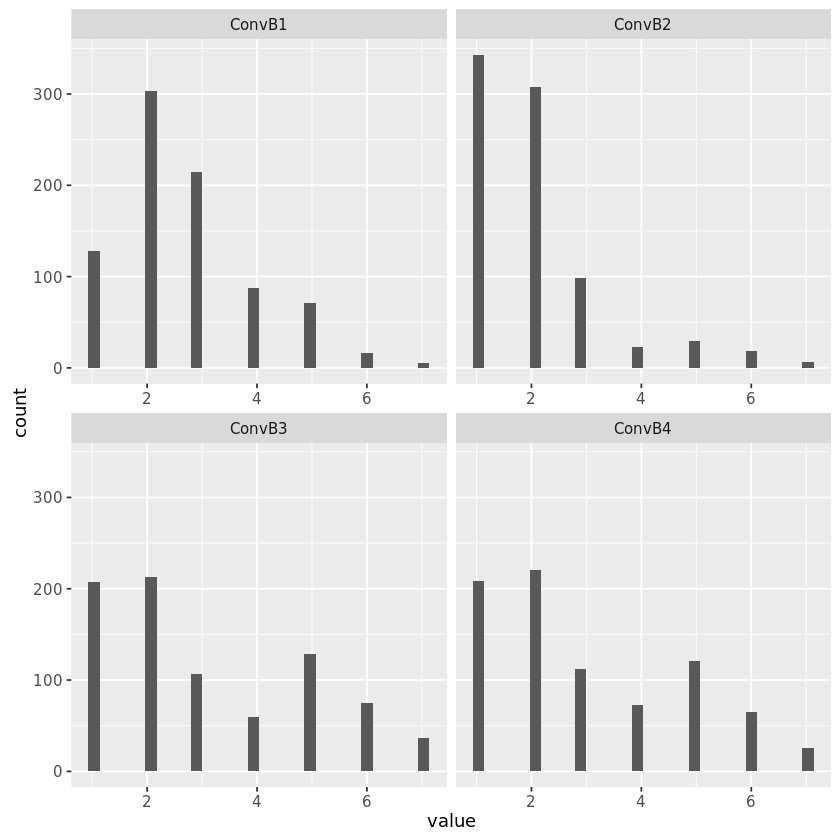

In [46]:
da <- melt(data,-c(40:43))
boxplot(data[,c(40:43)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


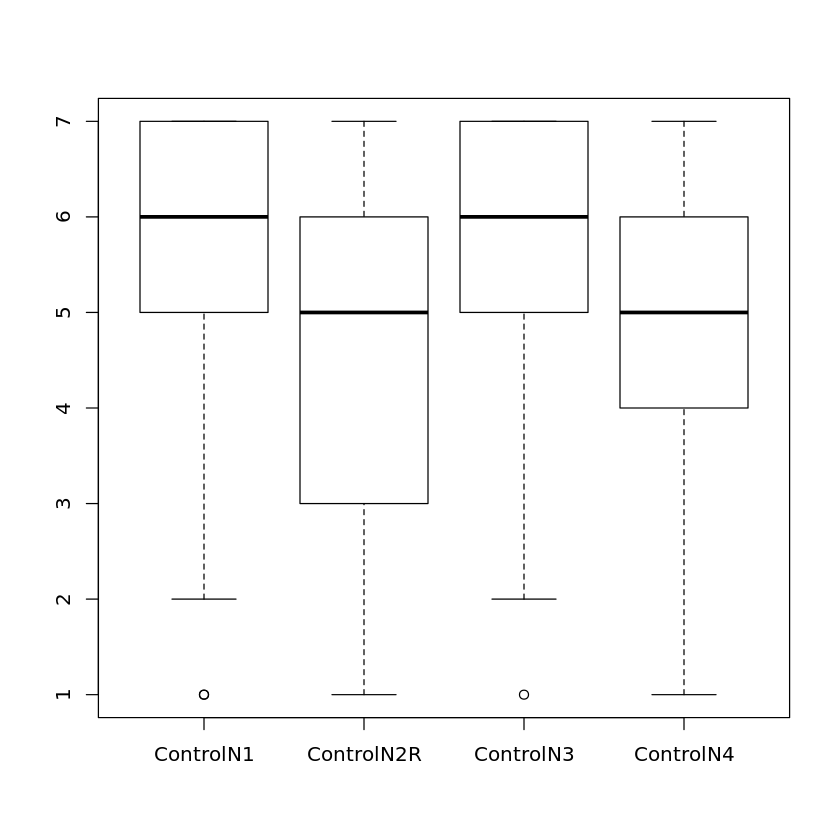

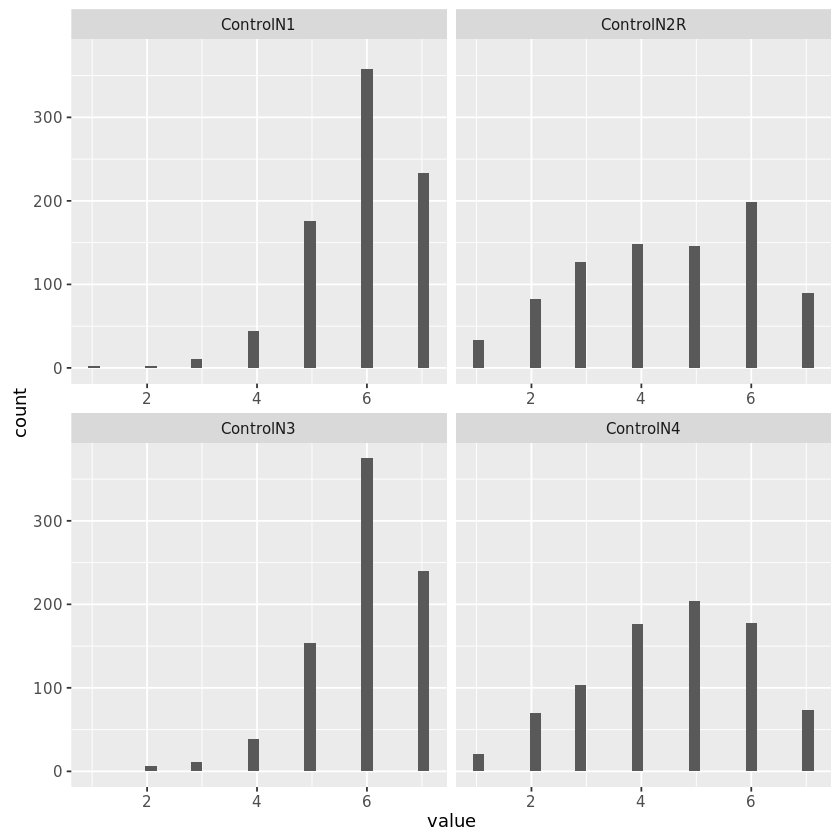

In [47]:
da <- melt(data,-c(44:47))
boxplot(data[,c(44:47)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


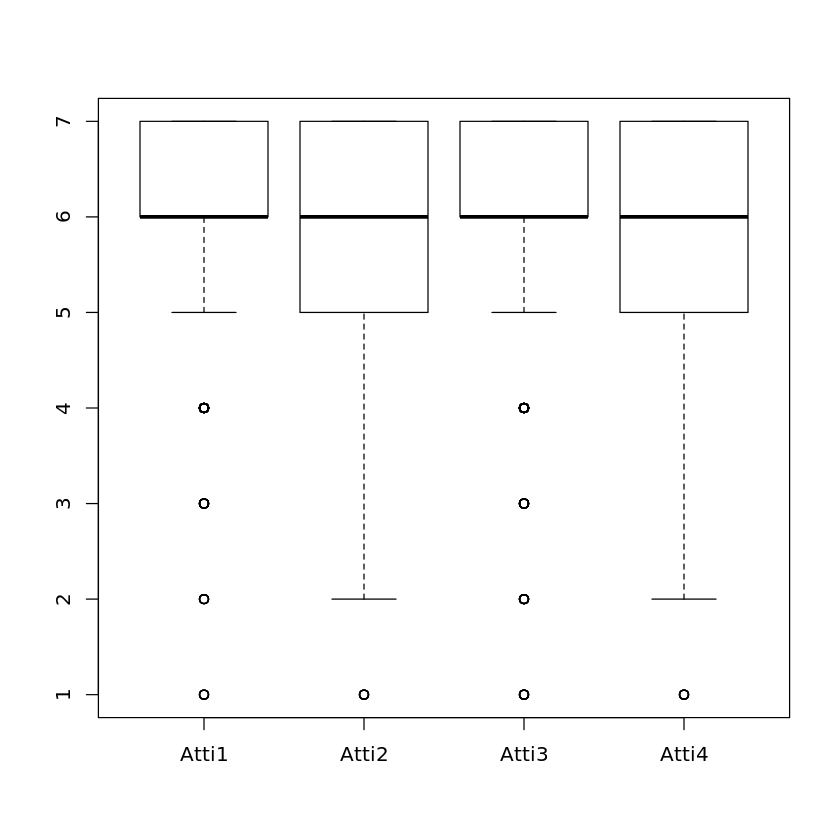

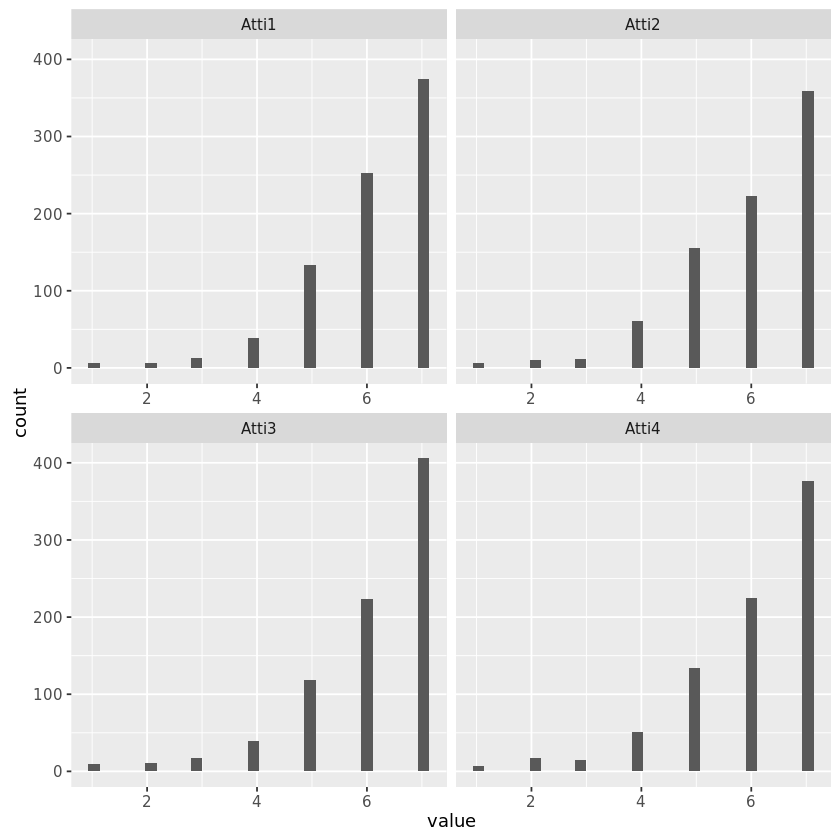

In [48]:
da <- melt(data,-c(48:51))
boxplot(data[,c(48:51)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


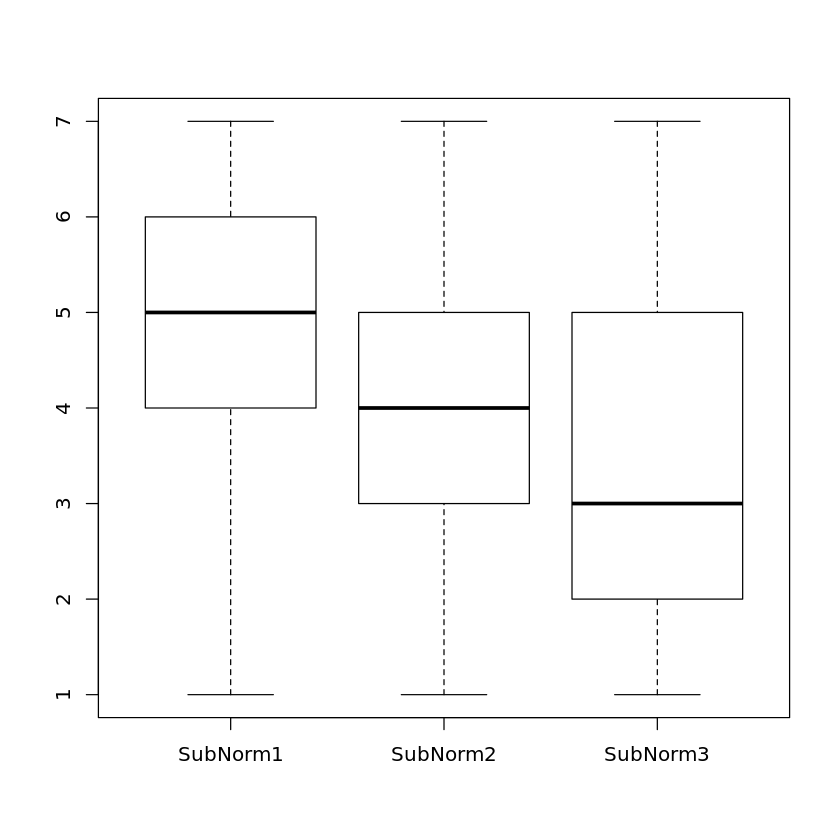

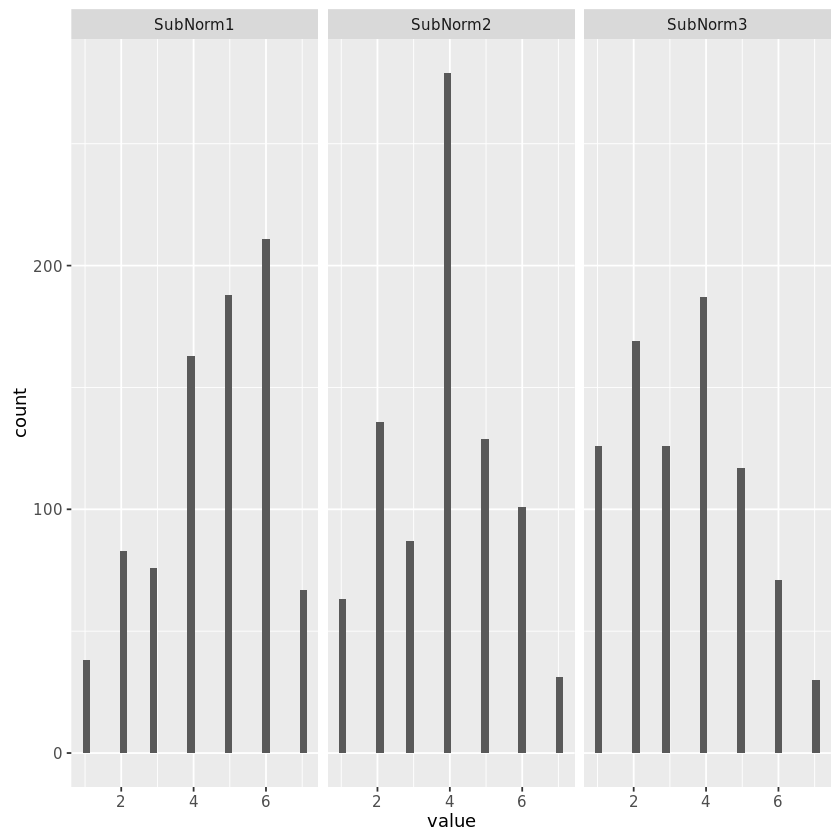

In [49]:
da <- melt(data,-c(52:54))
boxplot(data[,c(52:54)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 5 rows containing non-finite values (stat_bin)."

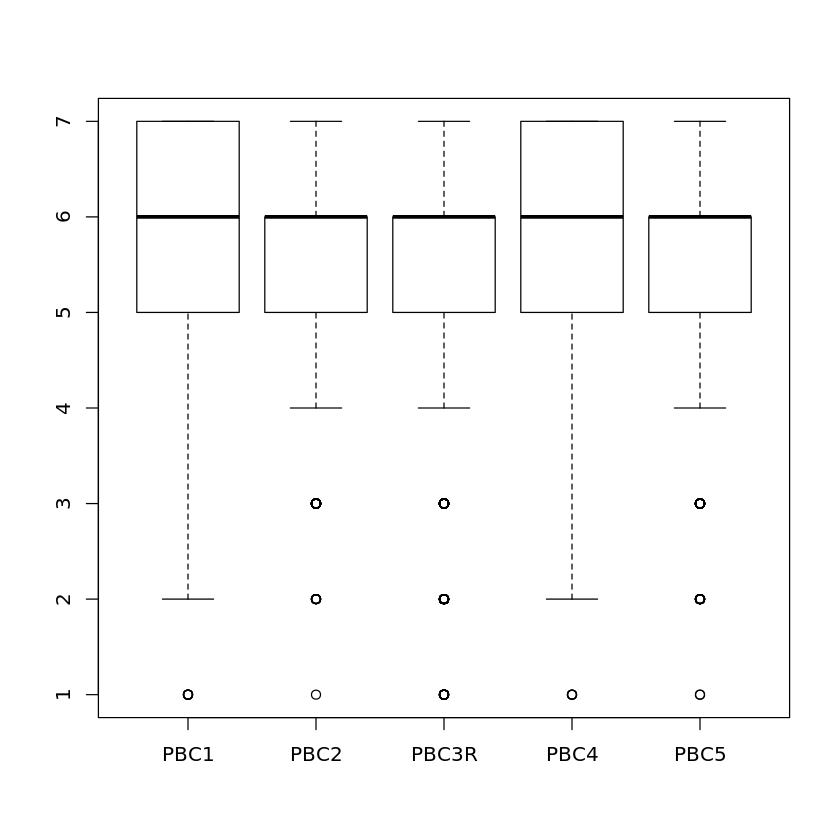

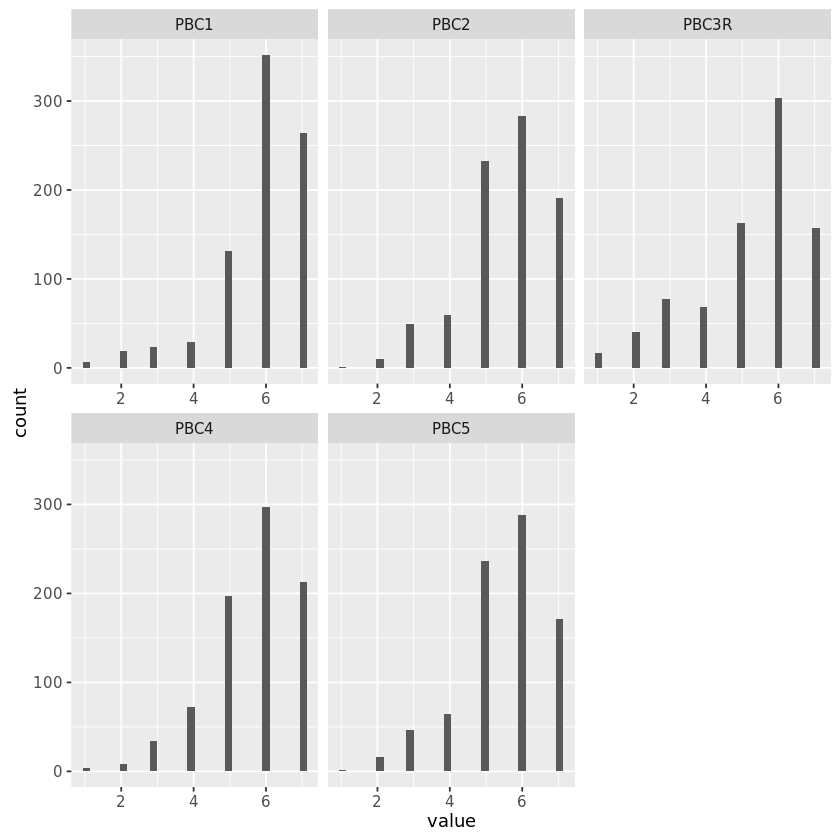

In [50]:
da <- melt(data,-c(55:59))
boxplot(data[,c(55:59)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 4 rows containing non-finite values (stat_bin)."

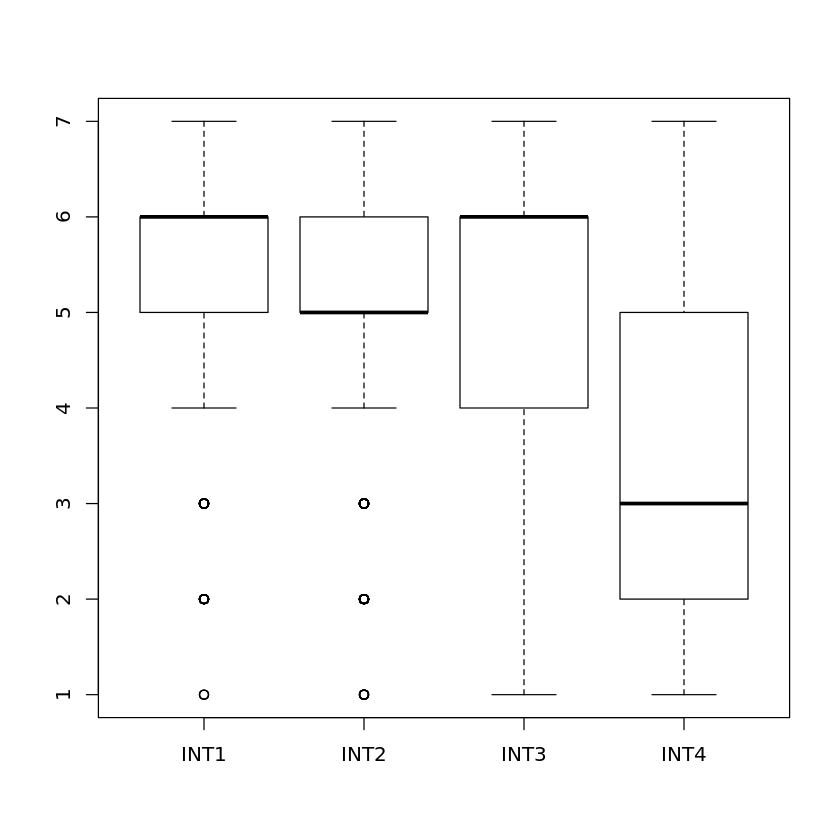

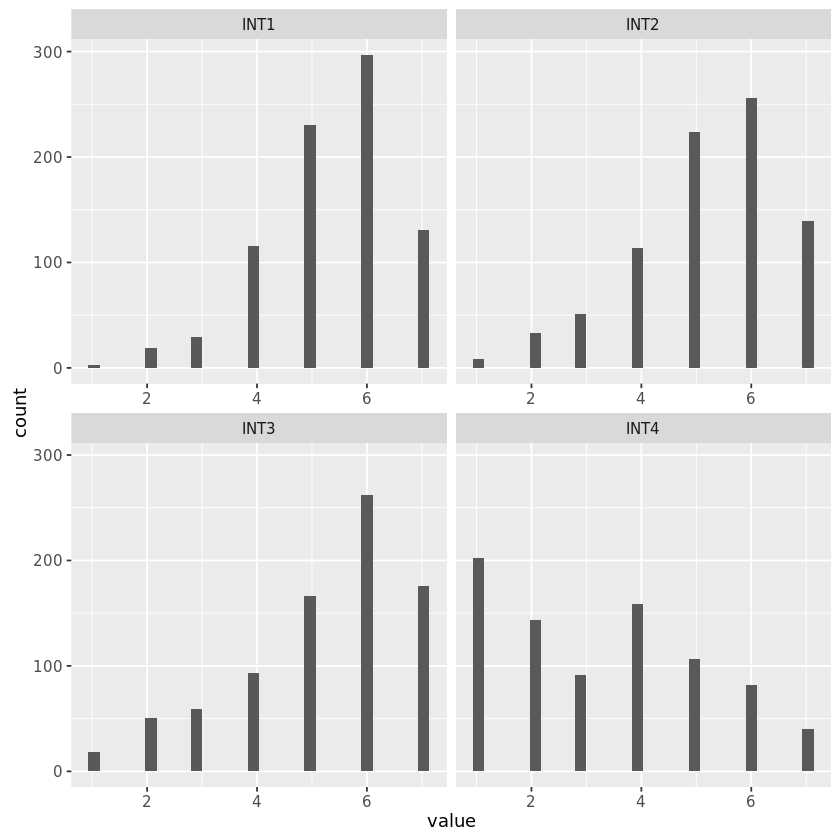

In [51]:
da <- melt(data,-c(60:63))
boxplot(data[,c(60:63)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 4 rows containing non-finite values (stat_bin)."

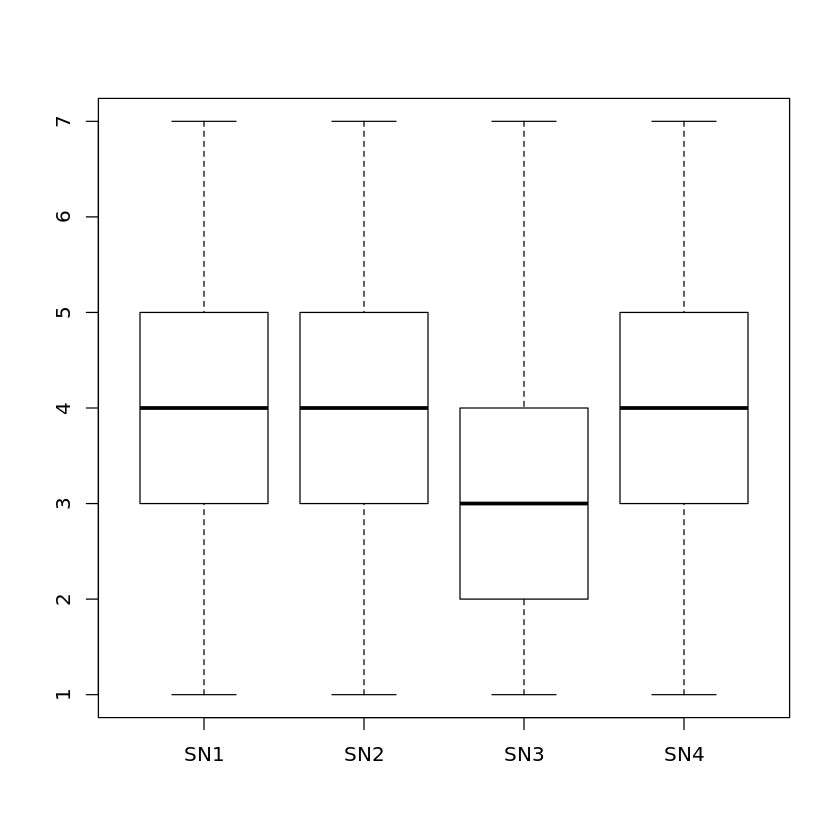

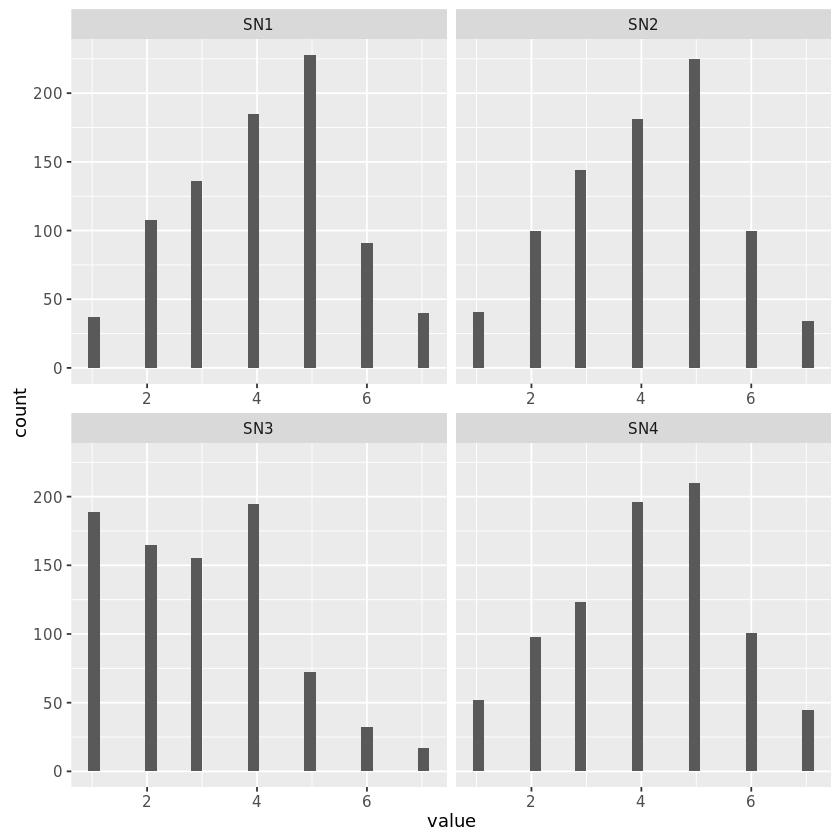

In [52]:
da <- melt(data,-c(64:67))
boxplot(data[,c(64:67)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 7 rows containing non-finite values (stat_bin)."

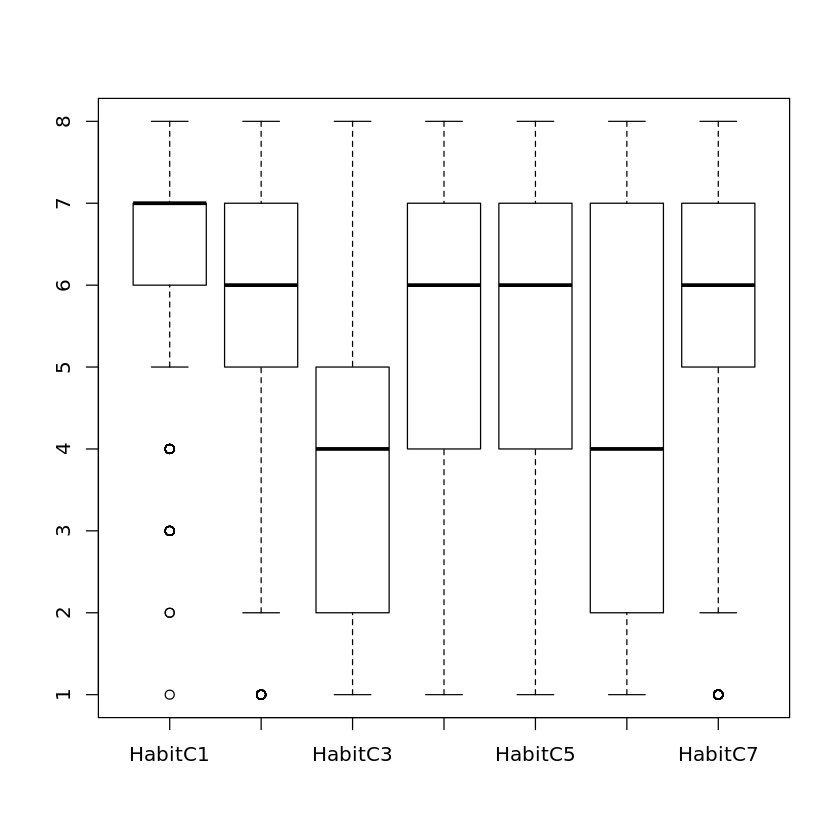

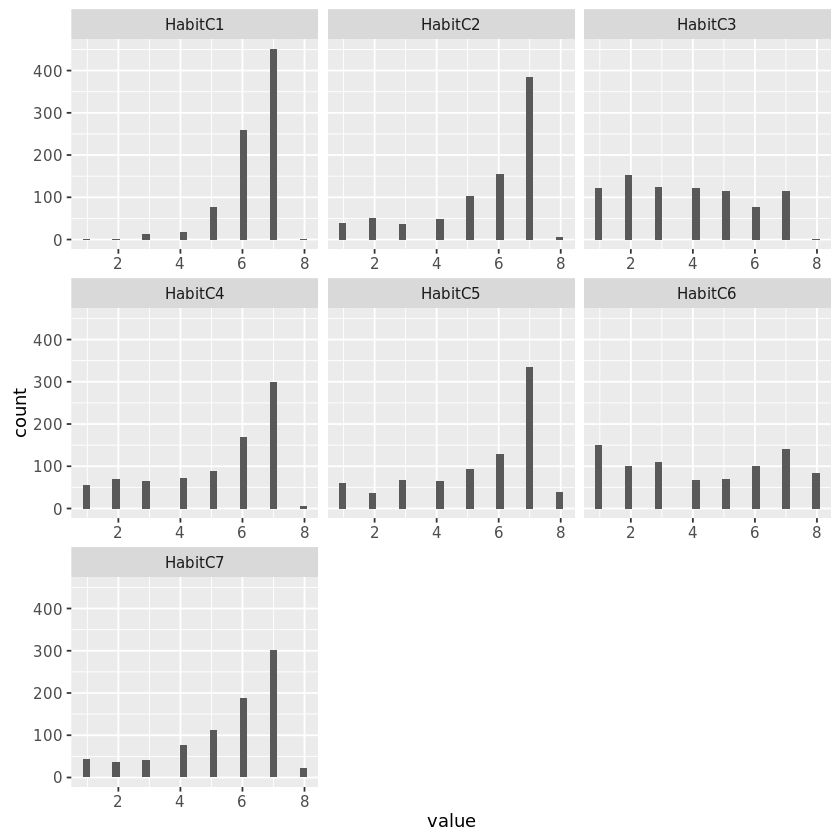

In [53]:
da <- melt(data,-c(68:74))
boxplot(data[,c(68:74)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 3 rows containing non-finite values (stat_bin)."

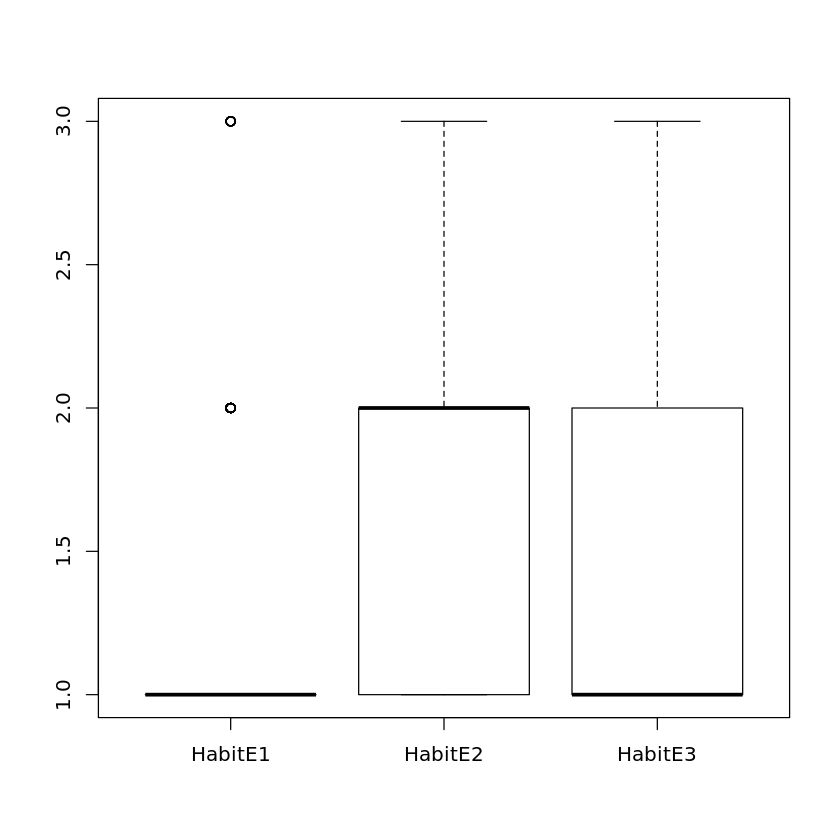

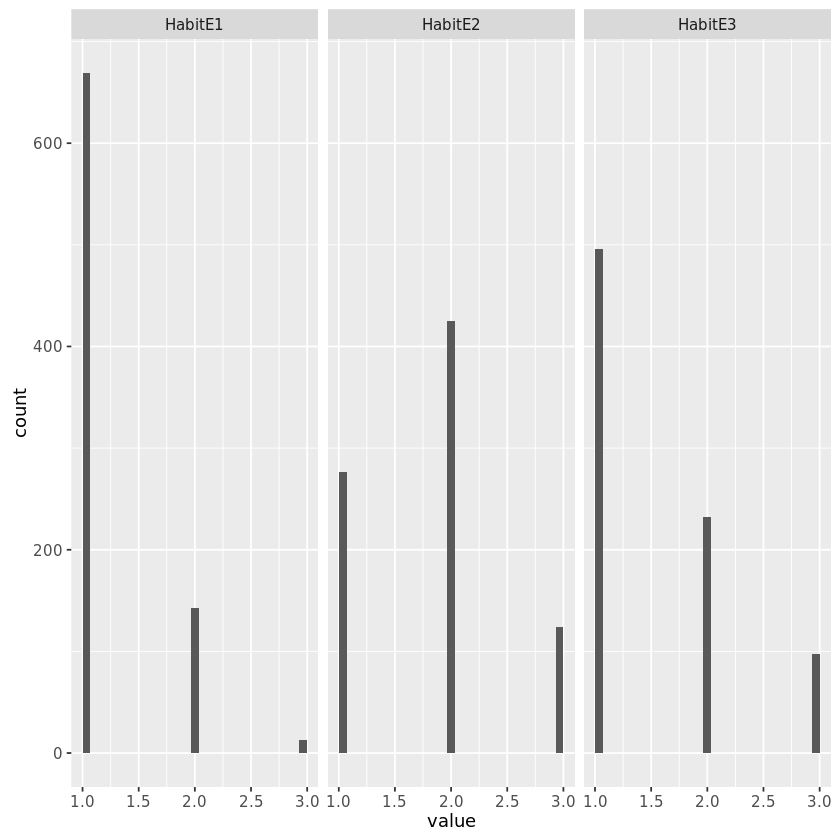

In [54]:
da <- melt(data,-c(75:77))
boxplot(data[,c(75:77)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

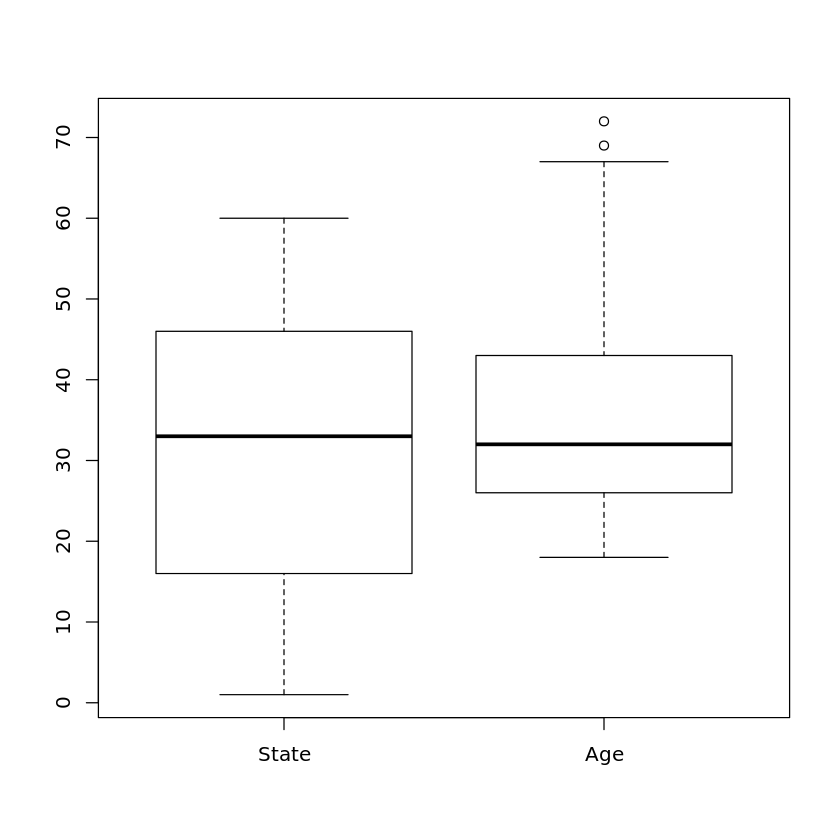

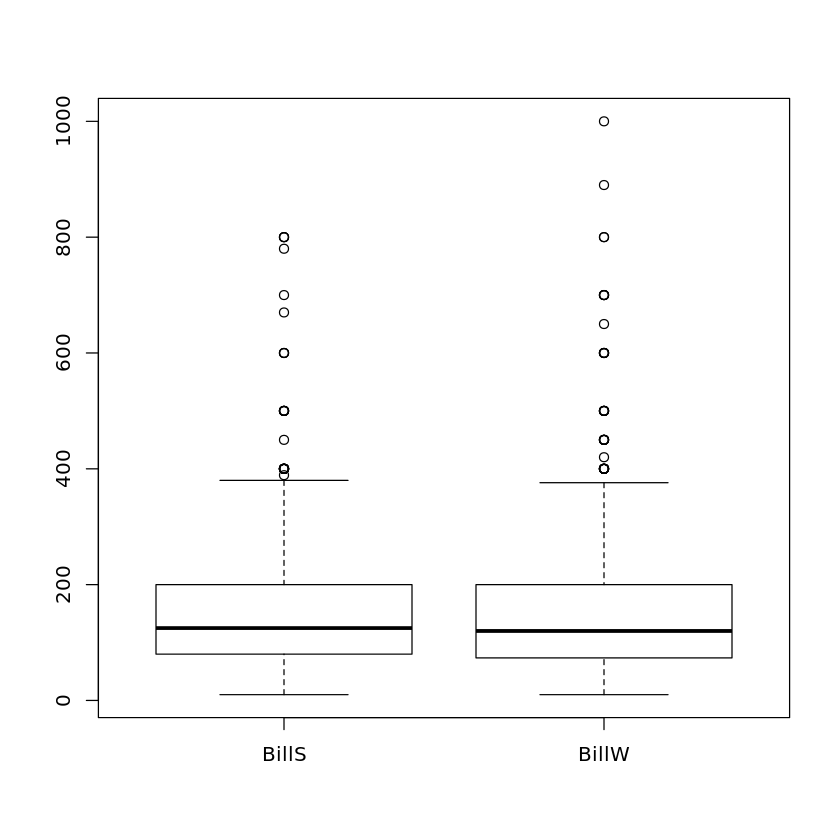

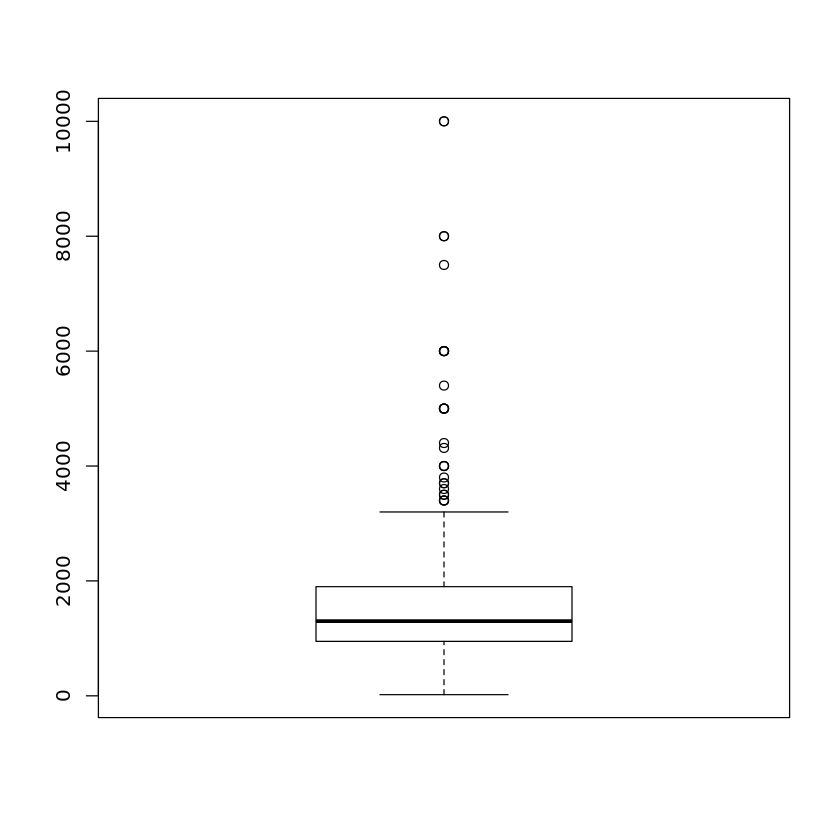

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 35 rows containing non-finite values (stat_bin)."

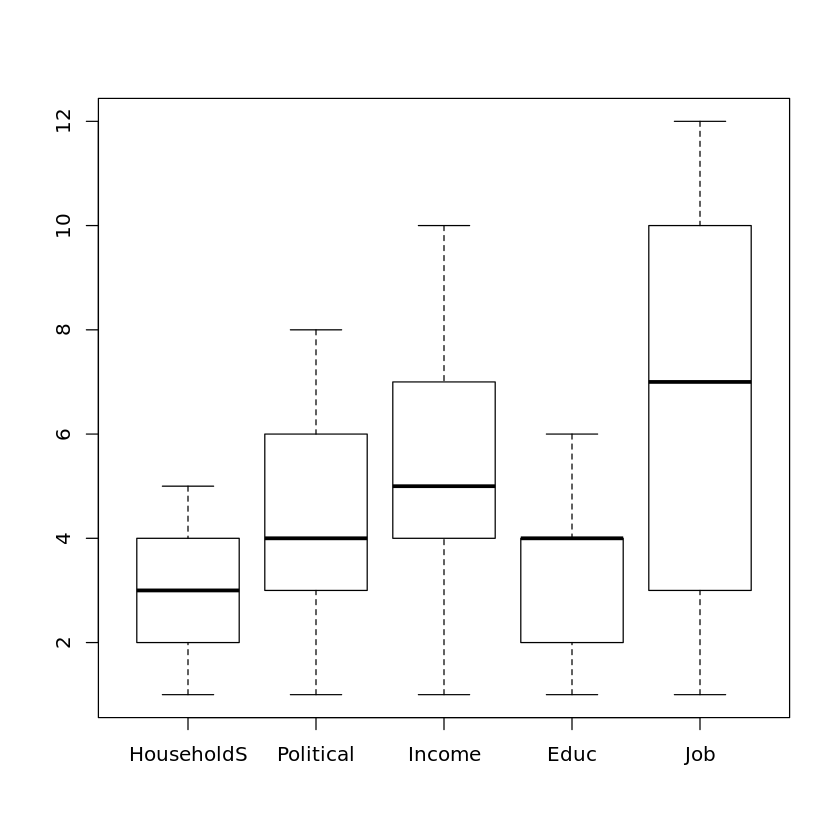

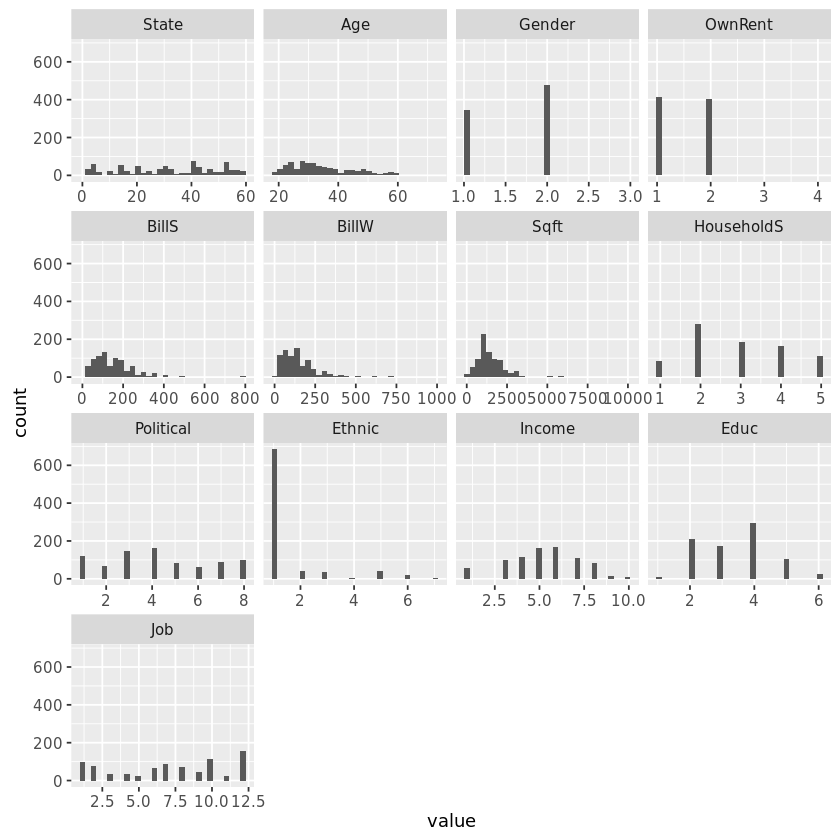

In [71]:
da <- melt(data,-c(78:90))
tmp1 <- data[ ,which(names(data) %in% c("State","Age"))];
boxplot(tmp1)
tmp2 <- data[ ,which(names(data) %in% c("BillS","BillW"))];
boxplot(tmp2)
tmp3 <- data[ ,which(names(data) %in% c("Sqft"))];
boxplot(tmp3)
tmp4 <- data[ ,which(names(data) %in% c("HouseholdS","Political","Income","Educ","Job"))]
boxplot(tmp4)
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 52 rows containing non-finite values (stat_bin)."

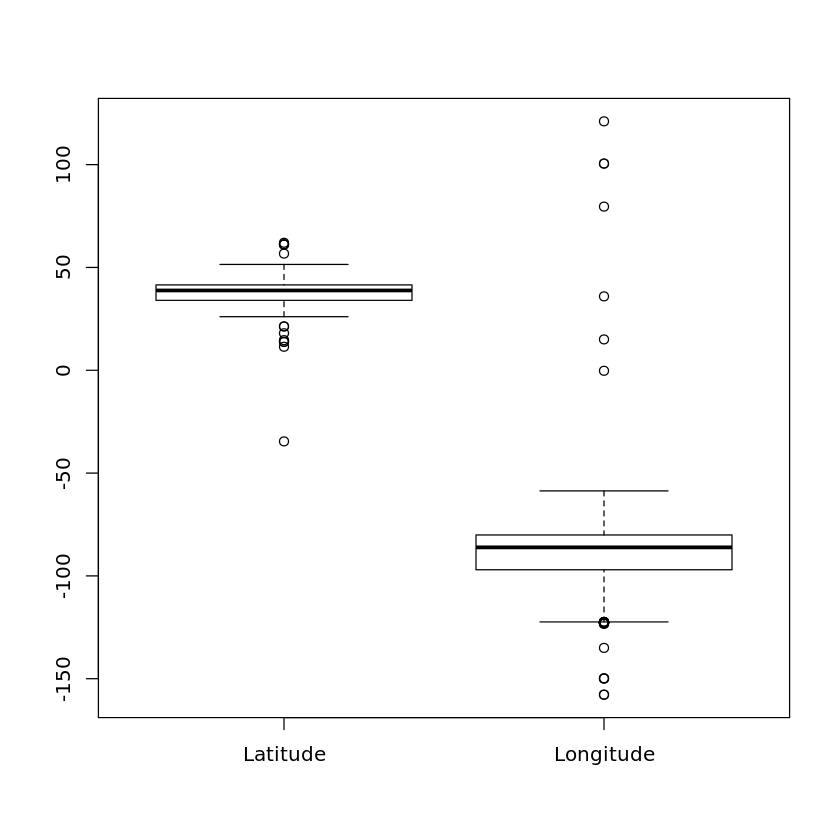

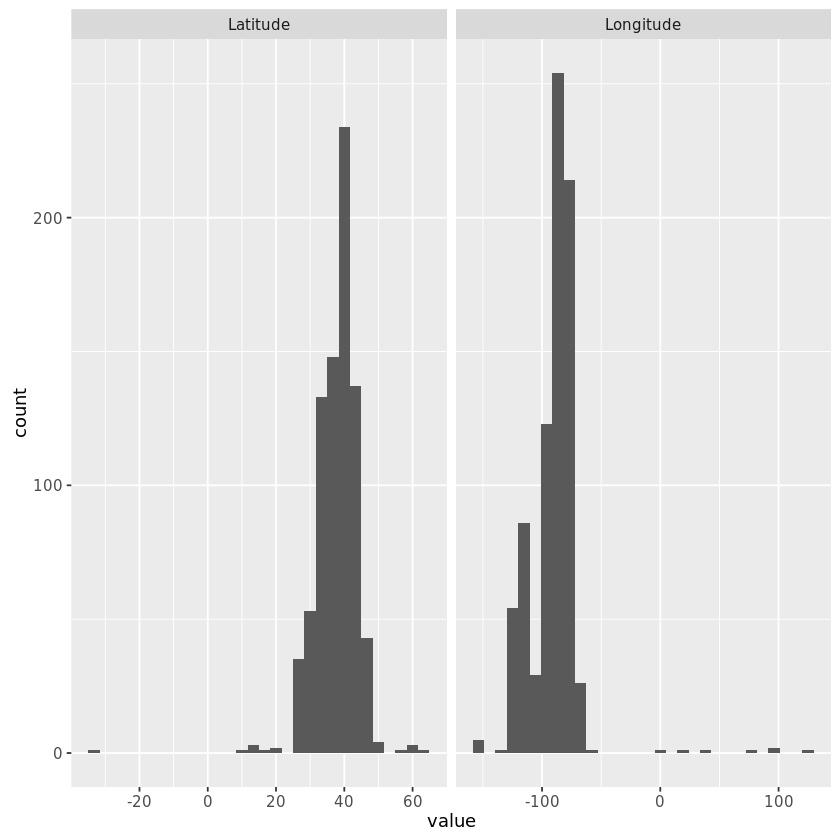

In [56]:
da <- melt(data,-c(91:92))
boxplot(data[,c(91:92)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


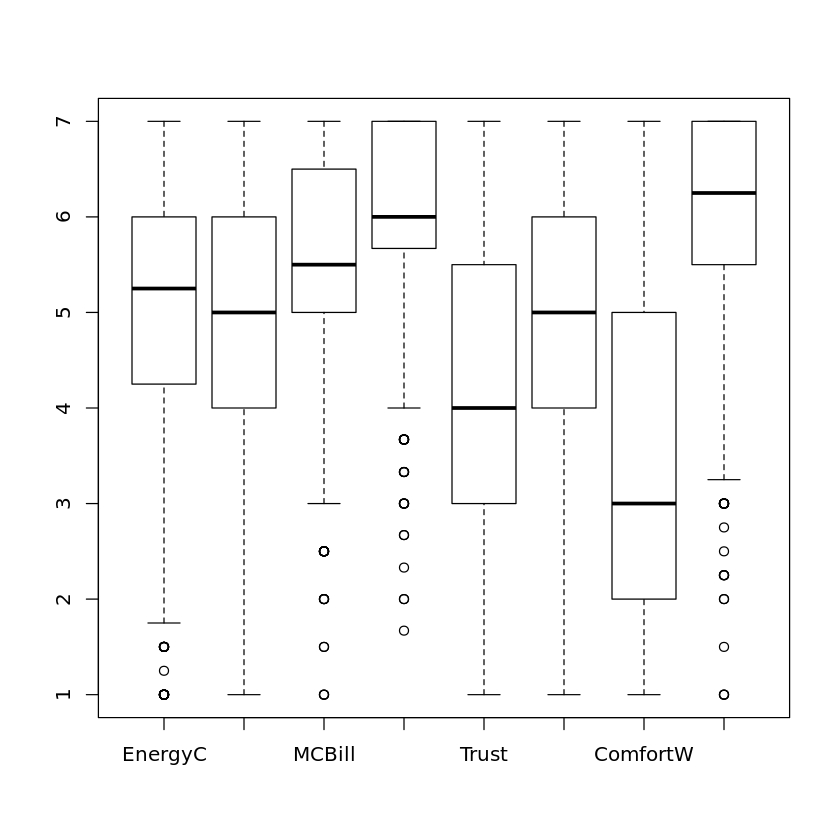

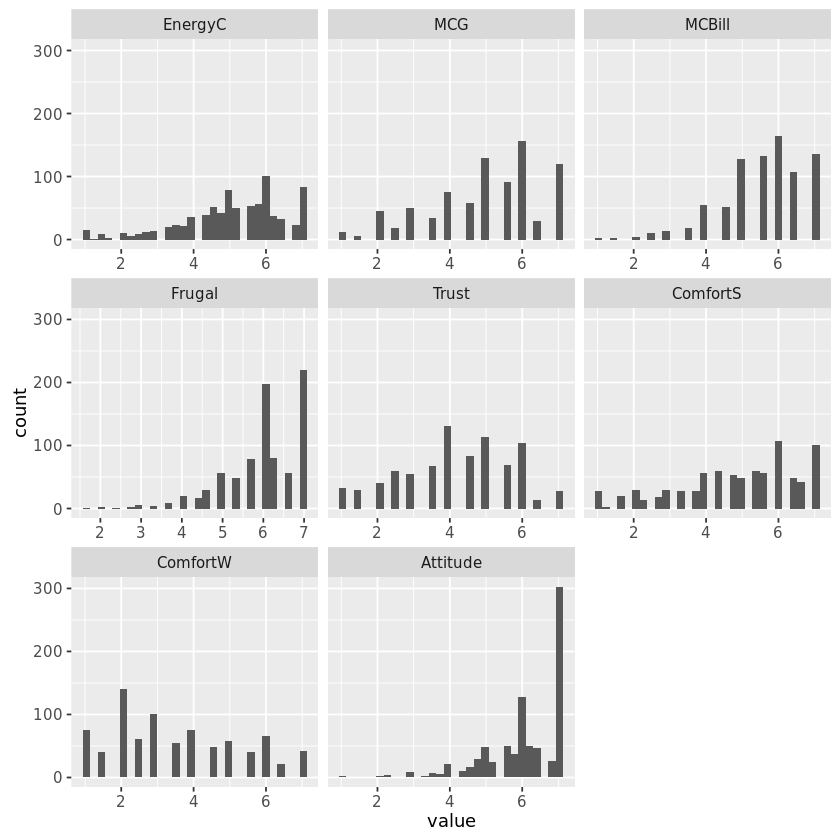

In [57]:
da <- melt(data,-c(93:100))
boxplot(data[,c(93:100)])
ggplot(da,aes(x=value))+facet_wrap(~variable,scales="free_x")+geom_histogram()

### Interpret  basic summaries

Interpret correlations

Now, just show top correlations

In [58]:
sel <- !is.na(apply(data,1,max));
print(sum(sel));print(length(sel))
selC = apply(data[sel,],2,var)>0

[1] 356
[1] 826


In [59]:
# Define a function
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
hiCor(data[sel,selC],.95)

,MC1,ComfNW2,PBC2,PBC4,MCG,ComfortW,PBC
MC1,1.000,-0.082,0.034,0.030,0.953,-0.103,0.032
ComfNW2,-0.082,1.000,-0.039,-0.055,-0.070,0.954,-0.052
PBC2,0.034,-0.039,1.000,0.869,0.042,-0.022,0.966
PBC4,0.030,-0.055,0.869,1.000,0.057,-0.039,0.964
MCG,0.953,-0.070,0.042,0.057,1.000,-0.089,0.051
ComfortW,-0.103,0.954,-0.022,-0.039,-0.089,1.000,-0.034
PBC,0.032,-0.052,0.966,0.964,0.051,-0.034,1.000


## How to select an orthogonal subset of predictors?

Lets take a look at principal components

In [60]:

sum(prcomp(data[sel,selC], retx=F,scale=T)$sdev^2)

[1] 105

[1] 0.13
    Atti1 Atti2 Atti4 INT1 Attitude
PC1   0.2   0.2  0.21  0.2     0.22
[1] 0.18
    IncHomeS IncAwayS IncEmer10S IncEmer30S Trust1 Trust3 Trust4 Trust ACYN
PC2    -0.24    -0.23      -0.23      -0.23  -0.21  -0.21  -0.21 -0.22 0.26
[1] 0.23
    IncHomeS IncAwayS IncEmer10S IncEmer30S Trust  ACYN
PC3     0.23     0.23       0.25       0.25  -0.2 -0.23
[1] 0.28
    ComfNW1 ComfortW
PC4     0.2      0.2
[1] 0.32
    IncDish IncAutoS IncAutoW IncEmer10W IncEmer30W
PC5   -0.21    -0.21    -0.22      -0.21      -0.23
[1] 0.36
    ComfNW1 ComfNW2 PBC2 PBC4 HabitC5 ComfortW  PBC
PC6    0.28    0.25 0.23 0.23   -0.22     0.28 0.24
[1] 0.39
    ComfNS1 ComfNS2 SubNorm2 ComfortS SubN
PC7   -0.24   -0.22     0.21    -0.25 0.22
[1] 0.42
     MC1  MC2  MCG
PC8 0.28 0.28 0.29
[1] 0.45
    HomeS AwayS BillS Latitude   hot cold
PC9 -0.25 -0.22 -0.21     0.27 -0.29 0.25
[1] 0.48
     HomeS AwayS  PBC2 BillW Income   PBC
PC10  0.25  0.22 -0.21  -0.2  -0.21 -0.21
[1] 0.5
     SubNorm2 OwnRent Sq

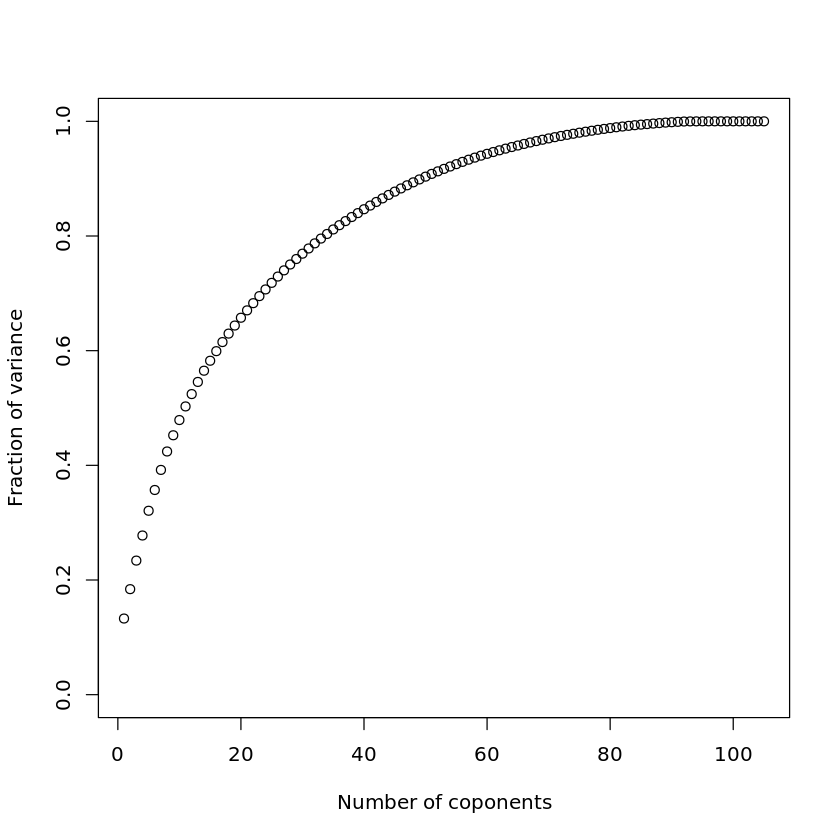

In [61]:
plot(1:sum(selC),cumsum(prcomp(data[sel,selC], retx=F,scale=T)$sdev^2)/
     sum(prcomp(data[sel,selC], retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");
res<-prcomp(data[sel,selC], retx=F,scale=T)$rotation[,1:30];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data[sel,selC], retx=F,scale=T)$sdev^2)/
     sum(prcomp(data[sel,selC], retx=F,scale=T)$sdev^2)

for (i in 1:30){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


### * Regress each predictor on the remaining predictors
eliminate with the highest adjR^2

In [62]:
c();
names(data);
dim(data)[2]

NULL

[1] "HomeW"      "HomeS"      "AwayW"      "AwayS"      "IncHomeS"  
  [6] "IncHomeW"   "RewardForm" "IncAwayS"   "IncAwayW"   "IncWD"     
 [11] "IncDish"    "IncAutoS"   "IncAutoW"   "IncEmer10S" "IncEmer30S"
 [16] "IncEmer10W" "IncEmer30W" "EmerRForm"  "EnergyC1"   "EnergyC2"  
 [21] "EnergyC3"   "EnergyC4"   "MC1"        "MC2"        "MC3"       
 [26] "MC4"        "MC5"        "Frugal1"    "Frugal2"    "Frugal3"   
 [31] "Trust1"     "Trust2"     "Trust3"     "Trust4"     "ComfNS1"   
 [36] "ComfNS2"    "ComfNS3"    "ComfNW1"    "ComfNW2"    "ConvB1"    
 [41] "ConvB2"     "ConvB3"     "ConvB4"     "ControlN1"  "ControlN2R"
 [46] "ControlN3"  "ControlN4"  "Atti1"      "Atti2"      "Atti3"     
 [51] "Atti4"      "SubNorm1"   "SubNorm2"   "SubNorm3"   "PBC1"      
 [56] "PBC2"       "PBC3R"      "PBC4"       "PBC5"       "INT1"      
 [61] "INT2"       "INT3"       "INT4"       "SN1"        "SN2"       
 [66] "SN3"        "SN4"        "HabitC1"    "HabitC2"    "HabitC3"   
 [71] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [76] "HabitE2"    "HabitE3"    "State"      "Age"        "Gender"    
 [81] "OwnRent"    "BillS"      "BillW"      "Sqft"       "HouseholdS"
 [86] "Political"  "Ethnic"     "Income"     "Educ"       "Job"       
 [91] "Latitude"   "Longitude"  "EnergyC"    "MCG"        "MCBill"    
 [96] "Frugal"     "Trust"      "ComfortS"   "ComfortW"   "Attitude"  
[101] "SubN"       "PBC"        "hot"        "cold"       "ACYN"      
[106] "HeatYN"

[1] 106

In [63]:
#res <- c();
vnam <- names(data);
for (i in 2:dim(data)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data))$r.squared,2)));
}
row.names(res) <- vnam[res[,1]];
res[order(-res[,2]),];

Warning message in summary.lm(lm(fmla, data = data)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = data)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = data)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = data)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = data)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = data)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = data)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = data)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = data)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = 

ERROR: Error in vnam[res[, 1]]: only 0's may be mixed with negative subscripts


### Finally select the model
  Note, that exploring only the predictor space is not leading to
     multiple comparisons issue!

  * replace lSEXP by lEXP: simpler 
  * why lLOC, lLA, lLD, lND, lNlgn: keep lND as most stable, keep lLOC?

In [ ]:
fmla ~ isBad ~ lNS+lLA+FIX+lLOC+lINT+lEXP

* We'll need to do prediction, so drop last few years

In [ ]:
data1 <- data;
data1$from <- risk$from/3600/24/365.25+1970;
dataFit <- data1[data1$from<=1997,]; #80%
dataTest <- data1[data1$from>1997,]; #20%

In [ ]:
mod <- glm(isBad ~ lNS+lLA+FIX+lLOC+lINT+lEXP,family=binomial,data=dataFit);
summary(mod); 

Note AIC: 2753

threfore lINT probably not important

### Good to order by variance explained (Anova Deviance/Df)

In [ ]:
anova(mod, test="Chi");

A similar picture, lINT does not explain as much as others

In [ ]:
mod <- glm(isBad ~ lNS+lND+FIX+lEXP+lINT,family=binomial,data=dataFit);
summary(mod);

### Slightly higher AIC: 2762, but a simpler model
   * don't chase the best fit, as it leads to overfitting

In [ ]:
anova(mod, test="Chi");#it is good to order predictors by deviance explained

* Note: use test="F" for linear models (lm)
* Note: R's anova order matters in variance explained, as
  each SS is based on the residuals from predictors going before it
* Alternative sum of squares for ANOVA are obtained via drop1
*  In this case it is based on the residuals of remaining predictors (not
  just of preceeding predictors

In [ ]:
drop1(mod, test="Chi");

### Variance inflation factor
 http://en.wikipedia.org/wiki/Variance_inflation_factor

In [ ]:
library(car)
vif(mod);

￼
* Is less than 5 (max is 3.1 for lND), but lower would be better

### Exercise: other diagnostics
* is model stable if some data is dropped?
* what if we change data as in GDF?
* is there a time trend 
    isBad ~ lNS+lND+FIX+lEXP+lINT+from
* independece (residuals)

Now interpret the model
* What do estimated coefficients mean?
* Increase NS from 1 to 2, but other predictors matter
* threfore pick values that are reasonable or a median

In [ ]:
try <- dataFit[1:2,];
for (i in dim(dataFit)[2])
  try[,i] <- median(dataFit[,i]);
try[1,"lNS"] <- 0;
try[2,"lNS"] <- log(2);
res <- 1/(1+exp(-predict(mod,try)));
res[2]*(1-res[1])/res[1]/(1-res[2]);

### The answer is how much the risk increases if number of subsystems touched is increased from 1 to 2
  * First ratio of risk then 
  * ratio of odds

# Do prediction

In [ ]:
predicted <- 1/(1+exp(-predict(mod,dataTest)));
tapply(predicted, dataTest$isBad, mean)

## Good to know
* predicted probability is almost three times higher for the MRs that break patches

### Traditional performance:

In [ ]:
for (cutof in c(.01, .015, .02, .03, .04, .045,.1)){
  res <- table(predicted>cutof, dataTest$isBad);
  type1 <- res[2,1]/(res[1,1]+res[2,1]);
  type2 <- res[1,2]/(res[1,2]+res[2,2]);
  recall <- 1 - type2;
  precision <- res[2,2]/(res[2,1]+res[2,2]);
  print (c(cutof,type1,type2,recall,precision));
}

### A single number such as ROC typically makes little sense:
* in this case the primary concern is decent recall

### Exercise:
* compare to a random predictor
* compare to a simple predictor, e.g, more than one subsystem

### Try other prediction methods

In [ ]:
library(rpart);

fmla <- isBad ~ lNS+lND+FIX+lINT+lEXP+lLA;
er <- c();
for (w in c(20,40,60,80, 100, 110)){ 
  cart.fit <- rpart(fmla,data=dataFit,method="class",weights=as.numeric(dataFit$isBad)*w+1);
  cart.pred <- predict(cart.fit,newdata=dataTest,type="class");
  res <- table(cart.pred, dataTest$isBad);
  type1 <- res[2,1]/(res[1,1]+res[2,1]);
  type2 <- res[1,2]/(res[1,2]+res[2,2]);
  recall <- 1 - type2;
  precision <- res[2,2]/(res[2,1]+res[2,2]);
  er <- rbind (er, c(w,type1,type2,recall,precision));
}

In [ ]:
### Slightly worse than the regression model